<b>AML2019</b>

<h3>Challenge 3</h3>
<h1>Anomaly Detection (AD)</h1>
<hr style="height:2px;border:none;color:#333;background-color:#333;"/>
<i>3<sup>th</sup> May 2019</i>

Anomaly detection (AD) refers to the process of detecting data points that do not conform with the rest of observations. Applications of anomaly detection include fraud and fault detection, surveillance, diagnosis, data cleanup, predictive maintenance.

When we talk about AD, we usually look at it as an unsupervised (or semi-supervised) task, where the concept of anomaly is often not well defined or, in the best case, just few samples are labeled as anomalous. In this challenge, we will look at AD from a different perspective!

The dataset we are going to work on consists of monitoring data generated by IT systems; such data is then processed by a monitoring system that executes some checks and detects a series of anomalies. This is a multi-label classification problem, where each check is a binary label corresponding to a specific type of anomaly. Our goal is to develop a machine learning model (or multiple ones) to accurately detect such anomalies.

This will also involve a mixture of data exploration, pre-processing, model selection, and performance evaluation. We will also try one rule learning model, and compare it with other ML models both in terms of predictive performances and interpretability. Interpreatibility is indeed a strong requirement especially in applications like AD where understanding the output of a model is as important as the output itself.


<div class="">
    <h2>Dataset Description</h2>
    <hr style="height:1px;border:none;color:#333;background-color:#333;"/>    
</div>

#### * Location of the Dataset on zoe
The data for this challenge is located at: `/mnt/datasets/anomaly`

#### * Files

You have a unique csv file with 36 features and 8 labels.
Each record contains aggregate features computed over a given amount of time.

#### * Attributes

A brief outline of the available attributes is given below.

1. <i>SessionNumber</i> (INTEGER): it identifies the session on which data is collected;
* <i>SystemID</i> (INTEGER): it identifies the system generating the data;
* <i>Date</i> (DATE): collection date;
* <i>HighPriorityAlerts</i> (INTEGER [0, N]): number of high priority alerts in the session;
* <i>Dumps</i> (INTEGER [0, N]): number of memory dumps;
* <i>CleanupOOMDumps</i> (INTEGER) [0, N]): number of cleanup OOM dumps;
* <i>CompositeOOMDums</i> (INTEGER [0, N]): number of composite OOM dumps;
* <i>IndexServerRestarts</i> (INTEGER [0, N]): number of restarts of the index server;
* <i>NameServerRestarts</i> (INTEGER [0, N]): number of restarts of the name server;
* <i>XSEngineRestarts</i> (INTEGER [0, N]): number of restarts of the XSEngine;
* <i>PreprocessorRestarts</i> (INTEGER [0, N]): number of restarts of the preprocessor;
* <i>DaemonRestarts</i> (INTEGER [0, N]): number of restarts of the daemon process;
* <i>StatisticsServerRestarts</i> (INTEGER [0, N]): number of restarts of the statistics server;
* <i>CPU</i> (FLOAT [0, 100]): cpu usage;
* <i>PhysMEM</i> (FLOAT [0, 100]): physical memory;
* <i>InstanceMEM</i> (FLOAT [0, 100]): memory usage of one instance of the system;
* <i>TablesAllocation</i> (FLOAT [0, 100]): memory allocated for tables;
* <i>IndexServerAllocationLimit</i> (FLOAT [0, 100]): level of memory used by index server;
* <i>ColumnUnloads</i> (INTEGER [0, N]): number of columns unloaded from the tables;
* <i>DeltaSize</i> (INTEGER [0, N]): size of the delta store;
* <i>MergeErrors</i> BOOLEAN [0, 1]: 1 if there are merge errors;
* <i>BlockingPhaseSec</i> (INTEGER [0, N]): blocking phase duration in seconds;
* <i>Disk</i> (FLOAT [0, 100]): disk usage;
* <i>LargestTableSize</i> (INTEGER [0, N]): size of the largest table;
* <i>LargestPartitionSize</i> (INTEGER [0, N]): size of the largest partition of a table;
* <i>DiagnosisFiles</i> (INTEGER [0, N]): number of diagnosis files;
* <i>DiagnosisFilesSize</i> (INTEGER [0, N]): size of diagnosis files;
* <i>DaysWithSuccessfulDataBackups</i> (INTEGER [0, N]): number of days with successful data backups;
* <i>DaysWithSuccessfulLogBackups</i> (INTEGER [0, N]): number of days with successful log backups;
* <i>DaysWithFailedDataBackups</i> (INTEGER [0, N]): number of days with failed data backups;
* <i>DaysWithFailedfulLogBackups</i> (INTEGER [0, N]): number of days with failed log backups;
* <i>MinDailyNumberOfSuccessfulDataBackups</i> (INTEGER [0, N]): minimum number of successful data backups per day;
* <i>MinDailyNumberOfSuccessfulLogBackups</i> (INTEGER [0, N]): minimum number of successful log backups per day;
* <i>MaxDailyNumberOfFailedDataBackups</i> (INTEGER [0, N]): maximum number of failed data backups per day;
* <i>MaxDailyNumberOfFailedLogBackups</i> (INTEGER [0, N]): maximum number of failed log backups per day;
* <i>LogSegmentChange</i> (INTEGER [0, N]): changes in the number of log segments.

#### * Labels

Labels are binary. Each label refers to a different anomaly.

* <i>Check1</i>;
* <i>Check2</i>;
* <i>Check3</i>;
* <i>Check4</i>;
* <i>Check5</i>;
* <i>Check6</i>;
* <i>Check7</i>;
* <i>Check8</i>;

# Data Exploration
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

The very first task of a building model task is to understand the data. In this section we will load, visualize and explore the meaning of the given data.

<div class="">
    <h3>1. First glance on data</h3>
</div>

Firstly we need to import some necessary packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Display all the columns
pd.options.display.max_columns = None

In [2]:
sns.set()

A quick check on the given data shows that it's a csv file without headers. To make the analysic process easier, we will define the columns name as below: 

In [3]:
# The base path lead to the data file
base = "/mnt/datasets/anomaly"

# Columns name in the same order with the data source
features = np.array([
    "SessionNumber",
    "SystemID",
    "Date",
    "HighPriorityAlerts",
    "Dumps",
    "CleanupOOMDumps",
    "CompositeOOMDums",
    "IndexServerRestarts",
    "NameServerRestarts",
    "XSEngineRestarts",
    "PreprocessorRestarts",
    "DaemonRestarts",
    "StatisticsServerRestarts",
    "CPU",
    "PhysMEM",
    "InstanceMEM",
    "TablesAllocation",
    "IndexServerAllocationLimit",
    "ColumnUnloads",
    "DeltaSize",
    "MergeErrors",
    "BlockingPhaseSec",
    "Disk",
    "LargestTableSize",
    "LargestPartitionSize",
    "DiagnosisFiles",
    "DiagnosisFilesSize",
    "DaysWithSuccessfulDataBackups",
    "DaysWithSuccessfulLogBackups",
    "DaysWithFailedDataBackups",
    "DaysWithFailedfulLogBackups",
    "MinDailyNumberOfSuccessfulDataBackups",
    "MinDailyNumberOfSuccessfulLogBackups",
    "MaxDailyNumberOfFailedDataBackups",
    "MaxDailyNumberOfFailedLogBackups",
    "LogSegmentChange",
])

# List of anomaly types
labels = np.array([
    "Check1",
    "Check2",
    "Check3",
    "Check4",
    "Check5",
    "Check6",
    "Check7",
    "Check8"])

In [4]:
# load data using predefined headers and character ; as the delimiter
data = pd.read_csv(base + '/data.csv', sep = ';', header=None, names = np.append(features, labels))

Check the shape of our data, columns information and show its first 10 records:

In [5]:
# Display the first 10 record
print ("\nDisplay the first 10 record")
display(data.head(n=10))

# Display the number of entries, columns, its corresponding name and dtype
print ("\nDisplay the data information")
data.info()


Display the first 10 record


SessionNumber  SystemID              Date  HighPriorityAlerts  Dumps  \
0              0         0  16/01/2017 04:04                   1    0.0   
1              1         1  06/02/2017 04:03                   0    0.0   
2              2         1  20/02/2017 04:03                   0    0.0   
3              3         2  13/02/2017 04:44                   1    0.0   
4              4         3  06/02/2017 04:31                   1    0.0   
5              5         4  06/02/2017 04:33                   1    0.0   
6              6         4  13/02/2017 04:33                   1    0.0   
7              7         0  13/02/2017 04:05                   0    0.0   
8              8         5  13/02/2017 04:01                   0    0.0   
9              9         6  06/02/2017 04:10                   2    0.0   

   CleanupOOMDumps  CompositeOOMDums  IndexServerRestarts  NameServerRestarts  \
0              0.0               0.0                    0                   0   
1              0.0               0.0                    0                   0   
2              0.0               0.0                    0                   0   
3              0.0               0.0                    0                   0   
4              0.0               0.0                    0                   0   
5              0.0               0.0                    0                   0   
6              0.0               0.0                    0                   0   
7              0.0               0.0                    0                   0   
8              0.0               0.0                    0                   0   
9              0.0               0.0                    0                   0   

   XSEngineRestarts  PreprocessorRestarts  DaemonRestarts  \
0                 0                     0               0   
1                 0                     0               0   
2                 0                     0               0   
3                 0                     0               0   
4                 0                     0               0   
5                 0                     0               0   
6                 0                     0               0   
7                 0                     0               0   
8                 0                     0               0   
9                 0                     0               0   

   StatisticsServerRestarts    CPU  PhysMEM  InstanceMEM  TablesAllocation  \
0                         0   4.77    61.86        37.48               0.0   
1                         0   1.05    32.82        12.77               0.0   
2                         0   0.66    35.16        13.00               0.0   
3                         0   3.17    82.93        52.94               0.0   
4                         0   2.92    76.18        20.51               0.0   
5                         0   3.40    85.44        82.05               0.0   
6                         0  15.44    85.62        82.46               0.0   
7                         0   4.83    64.28        42.09               0.0   
8                         0   5.42    85.49        59.80               0.0   
9                         0  34.93    90.47        75.34               0.0   

   IndexServerAllocationLimit  ColumnUnloads   DeltaSize  MergeErrors  \
0                         NaN              0  52884993.0          0.0   
1                         NaN              0  65546255.0          0.0   
2                         NaN              0  59582212.0          0.0   
3                         NaN              0  48229160.0          0.0   
4                         NaN              0  79452443.0          0.0   
5                         NaN              0  57984723.0          0.0   
6                         NaN              0  59368661.0          0.0   
7                         NaN              0  53573181.0          0.0   
8                         NaN              0  41573532.0          0.0   
9                       


Display the data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287031 entries, 0 to 287030
Data columns (total 44 columns):
SessionNumber                            287031 non-null int64
SystemID                                 287031 non-null int64
Date                                     287031 non-null object
HighPriorityAlerts                       287031 non-null int64
Dumps                                    287028 non-null float64
CleanupOOMDumps                          287028 non-null float64
CompositeOOMDums                         287028 non-null float64
IndexServerRestarts                      287031 non-null int64
NameServerRestarts                       287031 non-null int64
XSEngineRestarts                         287031 non-null int64
PreprocessorRestarts                     287031 non-null int64
DaemonRestarts                           287031 non-null int64
StatisticsServerRestarts                 287031 non-null int64
CPU                              

Our data contains **287,031** logs with **8 types of anomaly** and **36 features**. The data is in the form of numeric except column **Date**.

The data description shows that there are some features having constrain in their values such as the number of memory dumps should be a positive integer. We will check if there are any out of range values in our dataset. 

We convert the date from string into date object:

In [6]:
#Handle the date 
data['Date'] = pd.to_datetime(data['Date'], format = "%d/%m/%Y %H:%M")

Show the values range for each feature/label:

In [7]:
# Show value range for each feature
numerical_features_desc = pd.DataFrame(columns=["Name", "Min", "Mean", "Max"])
categorical_features_desc = pd.DataFrame(columns=["Name", "Min", "Max", "Unique"])

for f in np.append(features, labels):
    # numeric features
    if(f not in np.append(['MergeErrors', 'SystemID', 'Date', 'SessionNumber'], labels)):
        desc = data[f].describe()
        numerical_features_desc = numerical_features_desc.append(
            {'Name': f, 'Min': "{:.2f}".format(desc['min']), "Mean": "{:.2f}".format(desc['mean']), 
             "Max": "{:.2f}".format(desc['max'])}, ignore_index=True)
        
    # others
    else:
        # ignore the NaN values
        f_values = data[f].dropna()
        f_values = f_values.astype(str)
        desc = f_values.describe()
        categorical_features_desc = categorical_features_desc.append(
            {'Name': f, 'Unique': desc['unique'], "Min": np.min(f_values), 
             "Max": np.max(f_values)}, ignore_index=True)

display(numerical_features_desc)
display(categorical_features_desc)

Name         Min            Mean  \
0                      HighPriorityAlerts        0.00            2.80   
1                                   Dumps        0.00            0.72   
2                         CleanupOOMDumps        0.00            0.00   
3                        CompositeOOMDums        0.00            0.17   
4                     IndexServerRestarts        0.00            0.10   
5                      NameServerRestarts        0.00            0.06   
6                        XSEngineRestarts        0.00            0.05   
7                    PreprocessorRestarts        0.00            0.00   
8                          DaemonRestarts        0.00            0.00   
9                StatisticsServerRestarts        0.00            0.00   
10                                    CPU        0.12           12.50   
11                                PhysMEM        2.02          199.23   
12                            InstanceMEM        0.01           47.68   
13                       TablesAllocation        0.00           23.24   
14             IndexServerAllocationLimit        0.23           50.25   
15                          ColumnUnloads        0.00        15812.18   
16                              DeltaSize        0.00   6832394018.89   
17                       BlockingPhaseSec        0.00         3559.48   
18                                   Disk        0.21  74236450682.06   
19                       LargestTableSize        0.00    293355351.70   
20                   LargestPartitionSize        0.00    334967123.75   
21                         DiagnosisFiles        3.00          250.99   
22                     DiagnosisFilesSize  1514934.00   1962629814.20   
23          DaysWithSuccessfulDataBackups        0.00            5.92   
24           DaysWithSuccessfulLogBackups        0.00            7.68   
25              DaysWithFailedDataBackups        0.00            0.20   
26            DaysWithFailedfulLogBackups        0.00            0.55   
27  MinDailyNumberOfSuccessfulDataBackups        0.00            0.99   
28   MinDailyNumberOfSuccessfulLogBackups        0.00          121.92   
29      MaxDailyNumberOfFailedDataBackups        0.00            0.11   
30       MaxDailyNumberOfFailedLogBackups        0.00           81.02   
31                       LogSegmentChange   -16887.00            1.33   

                   Max  
0                24.00  
1              1429.00  
2                 0.00  
3               280.00  
4               341.00  
5               159.00  
6               150.00  
7                 0.00  
8                 0.00  
9                 9.00  
10             4602.49  
11          2070680.21  
12               99.15  
13               94.60  
14               99.55  
15          1192000.00  
16    1280000000000.00  
17         18761111.00  
18  373103799682844.50  
19       2147483645.00  
20       2147483645.00  
21           356265.00  
22    1730000000000.00  
23               14.00  
24               22.00  
25               13.00  
26               14.00  
27               17.00  
28             7156.00  
29               63.00  
30            66017.00  
31            10084.00

Name                  Min                  Max  Unique
0   SessionNumber                    0                99999  228196
1        SystemID                    0                  999    3188
2            Date  2017-01-06 13:42:00  2018-01-24 00:34:00   55791
3     MergeErrors                  0.0                  1.0       2
4          Check1                  0.0                  1.0       2
5          Check2                  0.0                  1.0       2
6          Check3                  0.0                  1.0       2
7          Check4                  0.0                  1.0       2
8          Check5                  0.0                  1.0       2
9          Check6                  0.0                  1.0       2
10         Check7                  0.0                  1.0       2
11         Check8                  0.0                  1.0       2

We have compared these information with the data description and had some observations as below:
- The log is collected from **3188 systems** within one year **from 06 Jan 2017 to 24 Jan 2018**
- All logs have zero of **cleanup OOM dumps**. This feature has no role in our model building process. 
- All logs have zero of **restarts of the preprocessor**. This feature has no role in our model building process. 
- All logs have zero of **restarts of the daemon process**. This feature has no role in our model building process. 
- **CPU**:  [0.12 , 4602.49] with the mean of 12.5. However in data description it should be in [0, 100]
- **Physical Memory**: [ 2.02 , 2,070,680.21] with the mean of 200. However in the data description it should be in [0, 100]
- **Disk**: [0.21 , 373,103,799,682,844.5] with the mean of 74,236,450,682. However in the data description it should be in [0, 100]
- **LogSegmentChange**: [-16887.0 , 10084.0] However in the data description it should be positive.
- All anomaly labels have valid data (0 means normal, 1 means anomaly)


Firstly we check features which have values out of range: CPU, Physical Memory, Disk. All these features should have values in range of [0, 100], however they have very large values compared to 100. We know that these figures are sensitive to system behavior, like a very high memory usage could indicate an anomaly. Let's check the distribution of these features and see that they are anomalies or not.  


261813 records with CPU smaller than 100 
9 records with CPU larger than 100 
9.0 anomaly detections with CPU larger than 100 
266433 records with PhysMEM smaller than 100 
31 records with PhysMEM larger than 100 
31.0 anomaly detections with PhysMEM larger than 100 
275464 records with Disk smaller than 100 
188 records with Disk larger than 100 
80.0 anomaly detections with Disk larger than 100 
Box plot for these features:


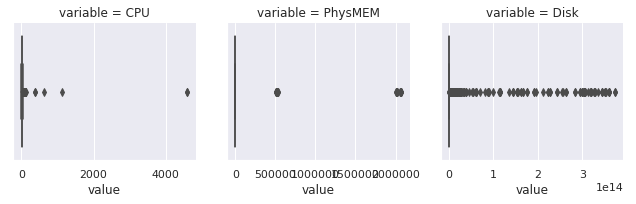

In [8]:
tmp_features = np.array(["CPU", "PhysMEM", "Disk"])

for f in tmp_features:
    # Data without NaN values in feature f
    df = data.dropna(subset = [f])
    # Data with f value < 100
    in_range_records = df.loc[df[f] <= 100]
    # Data with f value > 100
    out_of_range_records = df.loc[df[f] > 100]
    print("%s records with %s smaller than 100 " % (in_range_records.shape[0], f))
    print("%s records with %s larger than 100 " % (out_of_range_records.shape[0], f))
    # Get the labels of data with f > 100
    out_of_range_records = out_of_range_records.iloc[:,36:44].fillna(0)
    print("%s anomaly detections with %s larger than 100 " % (out_of_range_records.max(axis = 1).sum(), f))
    print("============================")

print("Box plot for these features:")
f = pd.melt(data, value_vars=tmp_features)
g = sns.FacetGrid(f, col="variable",sharex=False, sharey=False)
g = g.map(sns.boxplot, "value")



As our thought, 100% out-of-range CPU and Memory records indicate anomaly while this percent in Disk is around 50%.

Now let's check the last field which have out-of-range value: LogSegmentChange

245812 records with LogSegmentChange larger than 0 
5670 records with LogSegmentChange smaller than 0 
87759.0 anomaly detections with LogSegmentChange larger than 0 
3040.0 anomaly detections with LogSegmentChange smaller than 0 
Distribution plot for these features:


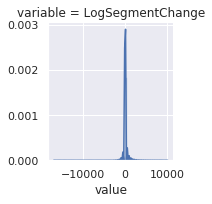

In [9]:
tmp_features = np.array(["LogSegmentChange"])

for f in tmp_features:
    # Data without NaN values in feature f
    df = data.dropna(subset = [f])
    # Data with f value < 100
    in_range_records = df.loc[df[f] >= 0]
    # Data with f value > 100
    out_of_range_records = df.loc[df[f] < 0]
    print("%s records with %s larger than 0 " % (in_range_records.shape[0], f))
    print("%s records with %s smaller than 0 " % (out_of_range_records.shape[0], f))
    # Get the labels of data with f > 0
    in_range_records = in_range_records.iloc[:,36:44].fillna(0)
    print("%s anomaly detections with %s larger than 0 " % (in_range_records.max(axis = 1).sum(), f))
    # Get the labels of data with f < 0
    out_of_range_records = out_of_range_records.iloc[:,36:44].fillna(0)
    print("%s anomaly detections with %s smaller than 0 " % (out_of_range_records.max(axis = 1).sum(), f))
    print("============================")

print("Distribution plot for these features:")
f = pd.melt(data, value_vars=tmp_features)
g = sns.FacetGrid(f, col="variable",sharex=False, sharey=False)
g = g.map(sns.distplot, "value")


According to the indicator, we see that there are more than 50% records with negative LogSegmentChange are anomalies. The corresponding ratio on positive LogSegmentChange is about 30%.

<div class="">
    <h3>2. Labels Overview</h3>
</div>

In this section we will have a look on types of anomaly. First let's check the number of anomaly and normal behaviors.

In [10]:
anomaly_count = data.iloc[:,36:44].max(axis=1).sum()

print("Number of anomaly detections: %s, take %s of whole data " % (anomaly_count,  "{:.2f}%".format(100*anomaly_count/data.shape[0])))


Number of anomaly detections: 102484.0, take 35.70% of whole data 


Now check the number of anomaly detections per each type.

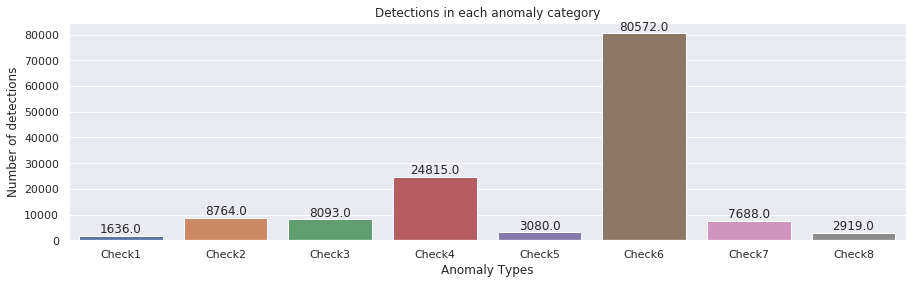

In [11]:
plt.figure(figsize=(15,4))
ax= sns.barplot(labels, data.iloc[:,36:].sum().values)
plt.title("Detections in each anomaly category")
plt.ylabel('Number of detections')
plt.xlabel('Anomaly Types')

#adding the text labels
rects = ax.patches
text_labels = data.iloc[:,36:].sum().values
for rect, label in zip(rects, text_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

We see that the **Check6** has most detections with 80,572 logs while the second popular one is **Check4** with 24,815 detections. There is not much difference between **Check2, Check3 and Check7** with around 7,500 - 8,500 detections. **Check5 and Check8** has around 3000 logs for each one. **Check1** occurs least with 1,636 anomalies.


Check if there are any logs with more than one type of anomaly detected

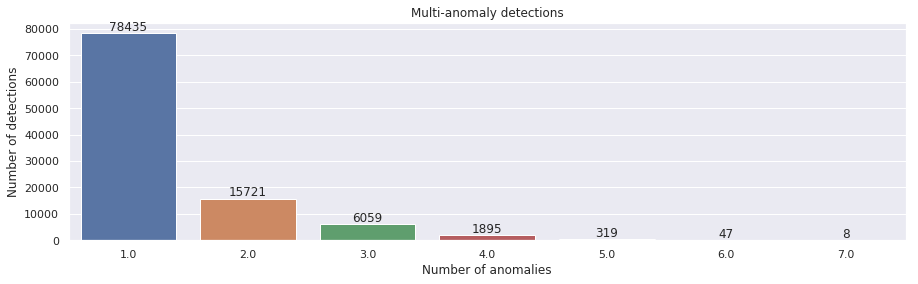

In [12]:
rowSums = data.iloc[:,36:].sum(axis=1)

multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

plt.figure(figsize=(15,4))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Multi-anomaly detections")
plt.ylabel('Number of detections')
plt.xlabel('Number of anomalies')

#adding the text labels
rects = ax.patches
text_labels = multiLabel_counts.values
for rect, label in zip(rects, text_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

There are **78,435 single anomaly detections** and around **22,000 multi-anomaly detections**. These detections are combinations of 2 to 7 types of anomaly. **Then our problem is the multi-label problem**. We check that if there is any correlation between labels. 

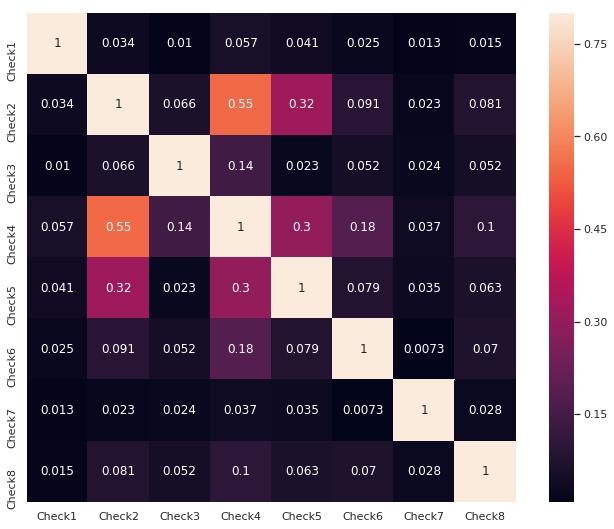

In [13]:
#labels correlation
correlation_matrix = data.iloc[:,36:].corr()

fig = plt.figure(figsize=(12,9))

sns.heatmap(correlation_matrix,vmax=0.8,square = True,annot = True)

plt.show()


There is a **moderate correlation between Check4 ad Check2**. Others are all weak positive correlations.

<div class="">
    <h3>3. Features Analysic</h3>
</div>

Our problem is to detect right types of anomaly. In this section, we will exploit the features in two perspectives: anomaly vs non-anomaly behaviors, and how our data are different in different types of anomaly.

Now we will build some functions to visualize data statistic:

In [14]:
def logs_per_f(f, graph_type = "bar", figsize=(15,8), data=data):
    '''
    The bar graph describes number of anomaly/normal logs per each value of feature f
    '''
    i = np.where(features == f)[0][0]
    
    # Get the data with f and anomaly info
    tmp_f_data = pd.DataFrame()
    tmp_f_data['Anomaly'] = data.iloc[:,36:44].max(axis=1)
    tmp_f_data[f] = data.iloc[:,i]
    tmp_f_data['tmp'] = data.iloc[:,i]

    # Display the bar graph of anomaly per f
    if(graph_type == "bar"):
        tmp_grouped_data = tmp_f_data.pivot_table(index=[f], 
                                              columns=['Anomaly'], 
                                              values='tmp',
                                              fill_value=0, 
                                              aggfunc='count')
        ax = tmp_grouped_data.plot.bar(rot=0,figsize=figsize)
        plt.title("Logs per %s" % f)
        plt.xlabel(f)
    else:
        if(graph_type == "dist"):   
            fig, ax = plt.subplots(figsize=figsize)
            sns.distplot(tmp_f_data.loc[tmp_f_data["Anomaly"] == 0., f], hist=False, rug=True, label="Normal")
            sns.distplot(tmp_f_data.loc[tmp_f_data["Anomaly"] == 1., f], hist=False, rug=True, label="Anomaly")
            plt.title("Logs per %s" % f)
            plt.xlabel(f)
            plt.show()

    

In [15]:
def anomaly_type_per_f(f, graph_type="bar", figsize=(15,8), data=data):
    '''
    The bar graph expresses the number of different types of anomaly per each value of feature f
    The dist graph expresses the distribution of feature f in different types of anomaly
    '''
    i = np.where(features == f)[0][0]
    if(f in ['CPU', 'PhysMEM', 'Disk']):
        # we care about values in valid range [0, 100] only for easier visualization
        tmp_data = data.loc[data[f] <= 100]
        tmp_f_data = tmp_data.iloc[:,36:44]
        tmp_f_data[f] = tmp_data.iloc[:,i]
    else:
        tmp_f_data = data.iloc[:,36:44]
        tmp_f_data[f] = data.iloc[:,i]
    
    if(graph_type == "bar"):
        tmp_f_data = tmp_f_data.groupby(f).sum()
        ax = tmp_f_data.plot.bar(rot=0,figsize=figsize)
        plt.title("Anomalies types per %s" % f)
        plt.xlabel(f)
    else:
        if(graph_type == "dist"):   
            fig, ax = plt.subplots(figsize=figsize)
            for l in labels:
                sns.distplot(tmp_f_data.loc[tmp_f_data[l] == 1., f], hist=False, rug=True, label=l)
            plt.title("%s Distributions over Anomalies types" % f)
            plt.xlabel(f)
            plt.show()
    

In [16]:
def anomaly_per_f(f, graph_type="bar", top=0, data=data):
    '''
    The bar graph describes number of anomalies through the range value of feature f
    '''
    i = np.where(features == f)[0][0]
    
    tmp_f_data = pd.DataFrame()
    tmp_f_data['Anomaly'] = data.iloc[:,36:44].max(axis=1)
    tmp_f_data[f] = data.iloc[:,i]

    anomaly_per_f= (tmp_f_data.groupby(f).sum())
    
    if (graph_type == "dist"):
        sns.distplot(anomaly_per_f)
        plt.title("Anomalies per %s" % f)
        # Number of systems which have no anomalies
        print("Number of %s which have no anomalies: %s" 
          % (f, anomaly_per_f.loc[anomaly_per_f['Anomaly'] == 0.].count().values))
    else: 
        if (graph_type == "bar"):
            if(top > 0):
                anomaly_per_f = anomaly_per_f.nlargest(50, 'Anomaly')
                title = "Top " + str(top) + " Anomalies per " + f
            else:
                title = "Anomalies per " + f
            ax = anomaly_per_f.plot.bar(rot=0,figsize=(15,8))
            plt.title(title)
    plt.show()
    

<div class="">
    <h3>3.1. Anomaly vs Non-anomaly data</h3>
</div>

After the first part, we have some ideas about which features play an important role to the anomaly detection and which have no role at all. Now we do a deeper analysic on features.

We have showed basic statistics of features such as min, max and mean in section 1. Now we visualize the distribution of all features values except Date:

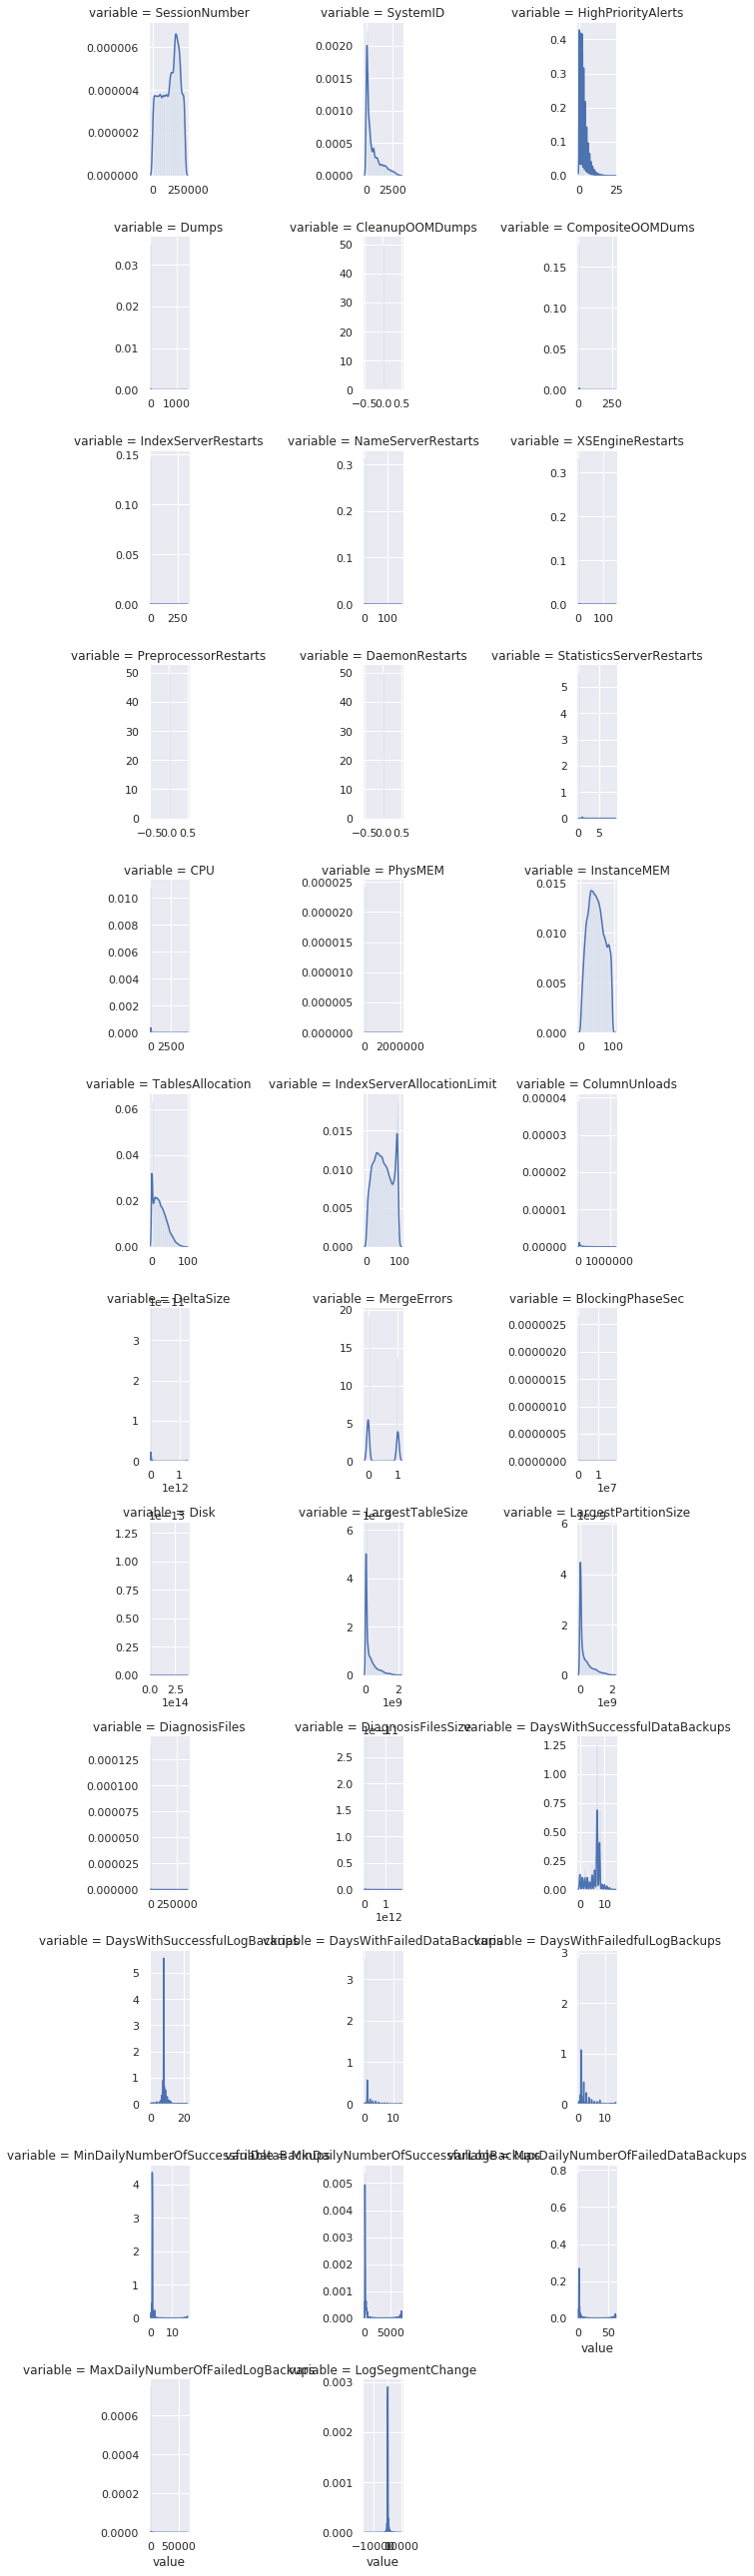

In [17]:
f = pd.melt(data, value_vars=np.delete(features, 2))
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Our problem is to detect anomalies, therefore features with uniform distribution may not bring much values to us.

#### * Non numeric features

As we know logs are collected in one year. We will group Date into month/day/hour to see the role of this field on anomaly detection.

In [18]:
# tmp values
tmp_date = data.iloc[:,2]

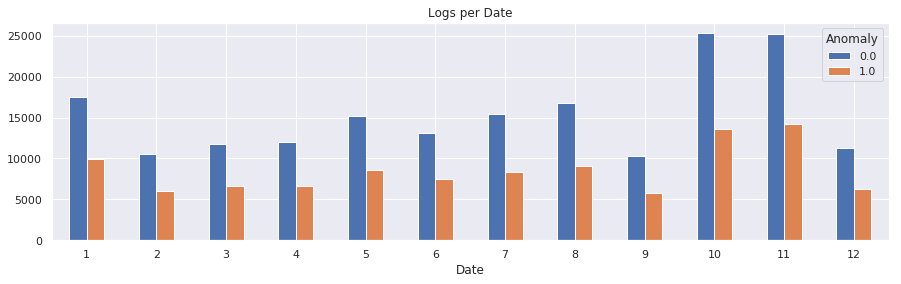

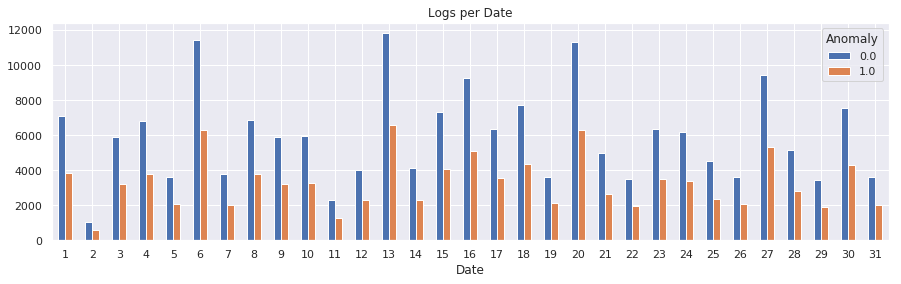

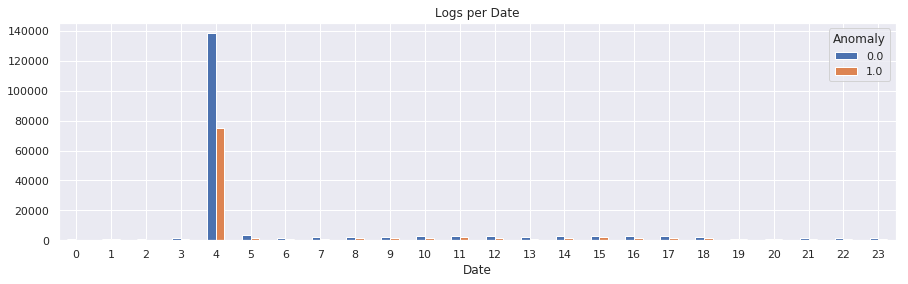

In [19]:
# Convert into month/day/hour and draw the distribution
data['Date'] = tmp_date.dt.month
logs_per_f('Date', "bar", figsize=(15,4))
data['Date'] = tmp_date.dt.day
logs_per_f('Date', "bar", figsize=(15,4))
data['Date'] = tmp_date.dt.hour
logs_per_f('Date', "bar", figsize=(15,4))

From these graphs we obserse that the ratio of anomalies to normal behaviors per month, day or hour is all around 50%. There are some periods which have more logs than others but the anomaly rate doesn't change much, for example in Oct and Nov, in the begin of week or at around 4h.

It seems that Date is not a key feature in anomaly detection. However at this step we still keep this feature.

In [20]:
data['Date'] = tmp_date

del(tmp_date)

Check the number of anomaly detection on MergeErrors

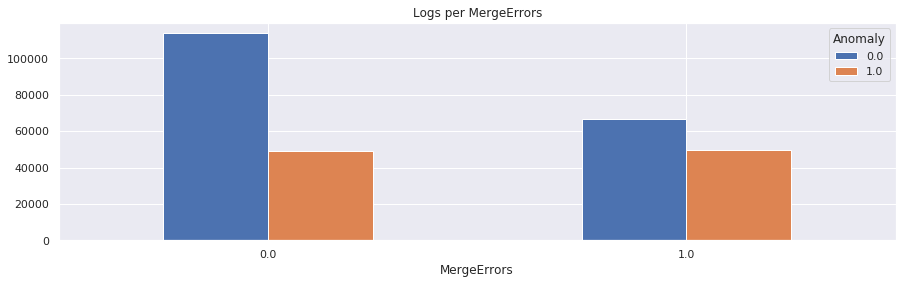

In [21]:
for f in ["MergeErrors"]:
    logs_per_f(f, "bar", figsize=(15,4))

From these graphs we obserse that anomalies are more likely detected when there are errors in merge process


#### * Numeric features

Now we check the distribution of features in anomaly/normal logs. SystemID is a categorical feature, however there are more than 3,000 systems then we put it here to easily generate graph.

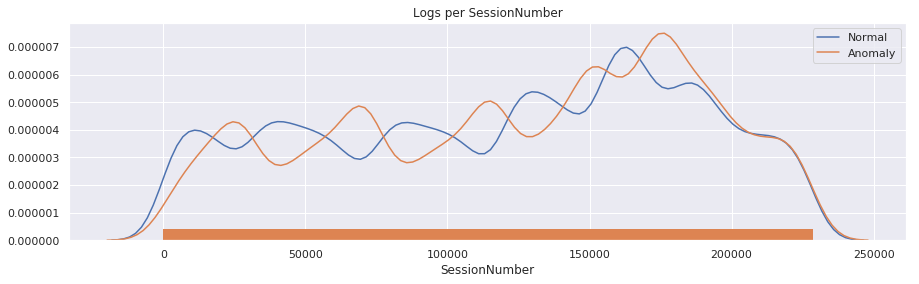

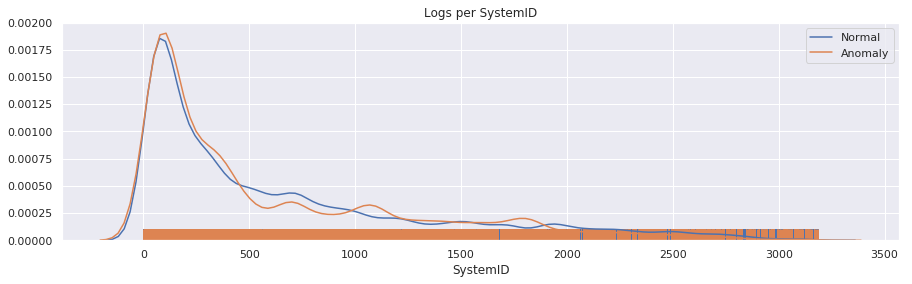

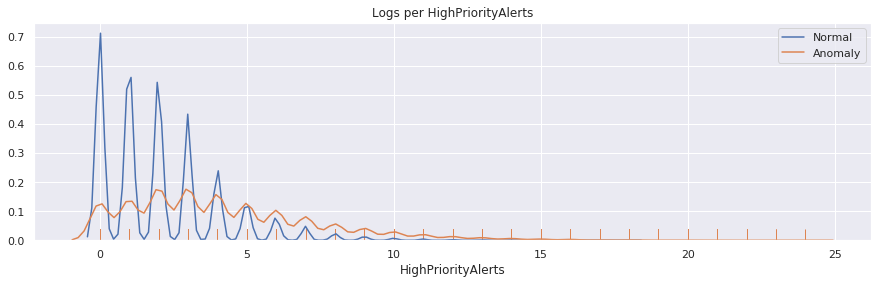

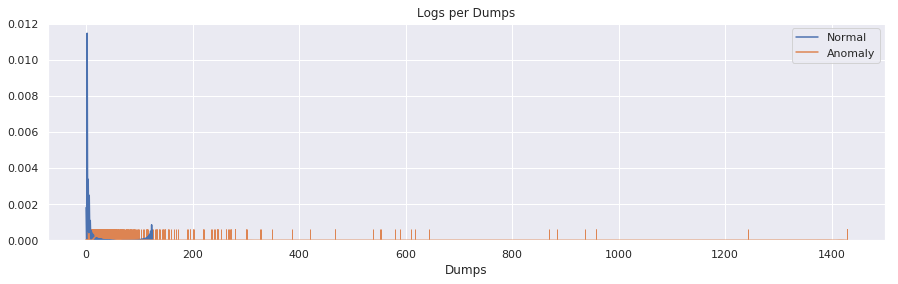

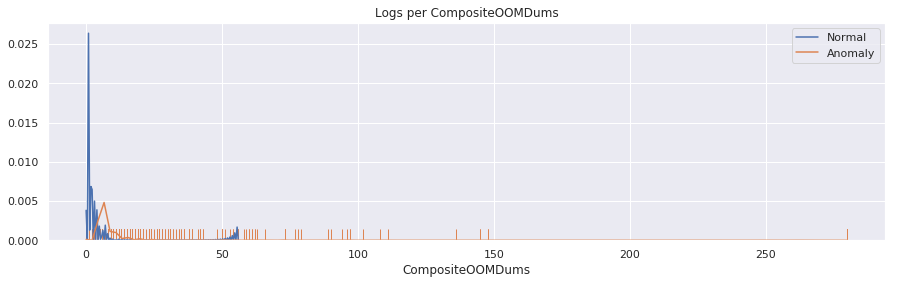

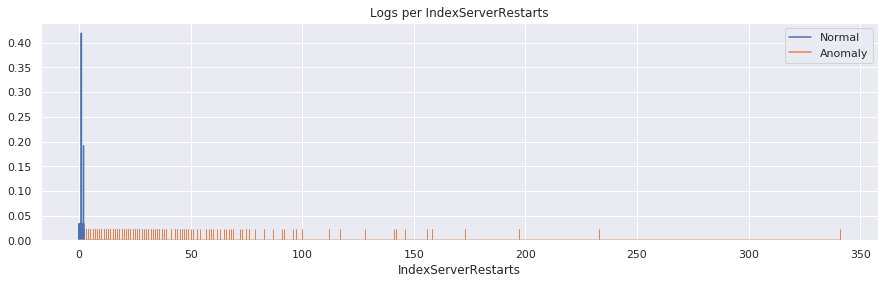

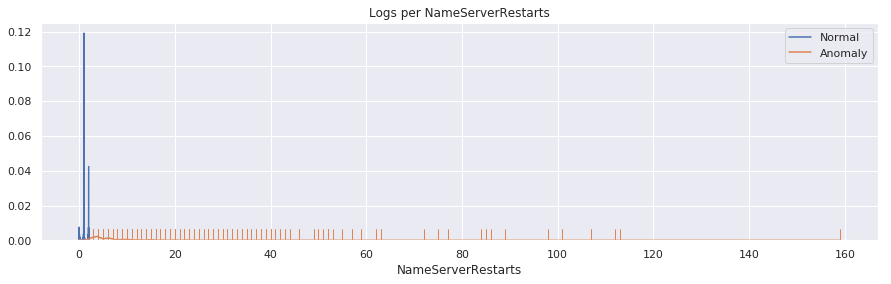

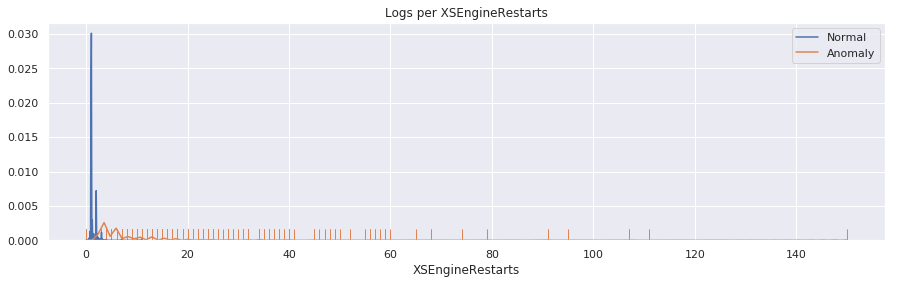

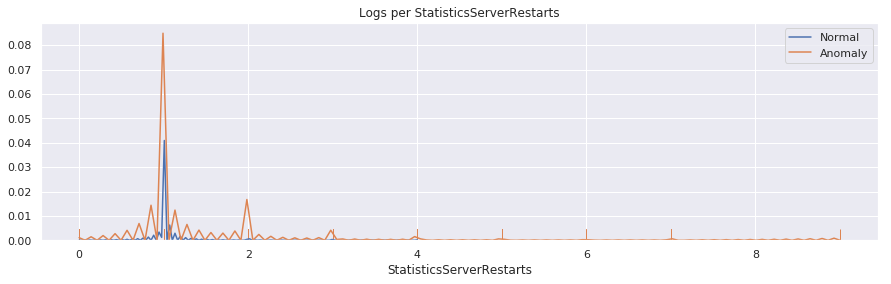

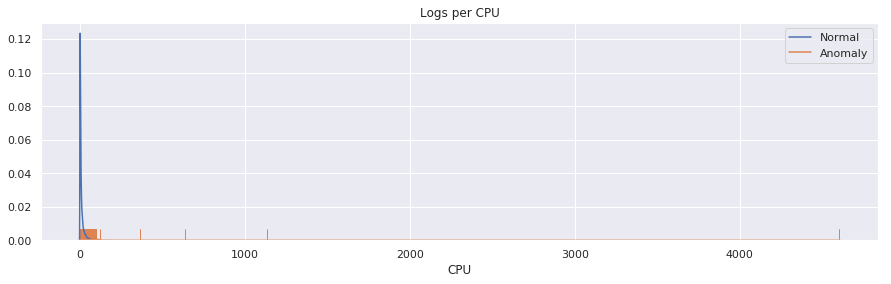

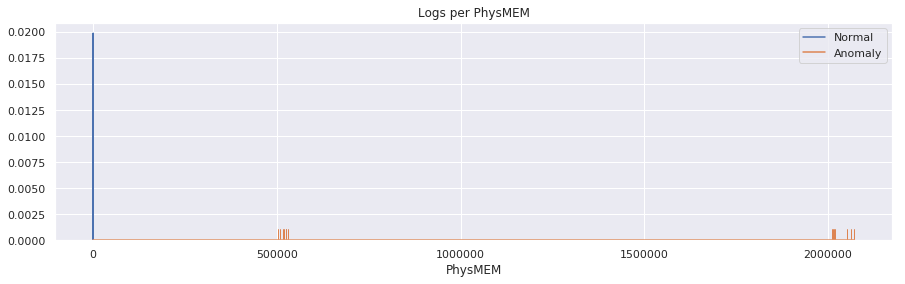

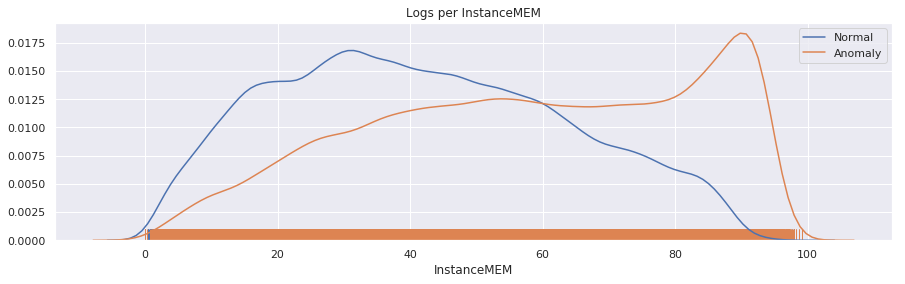

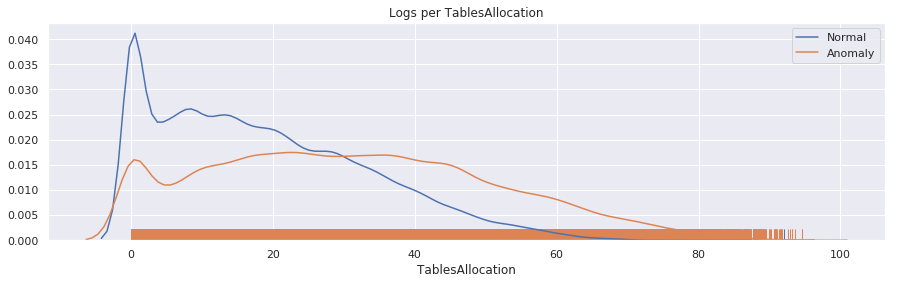

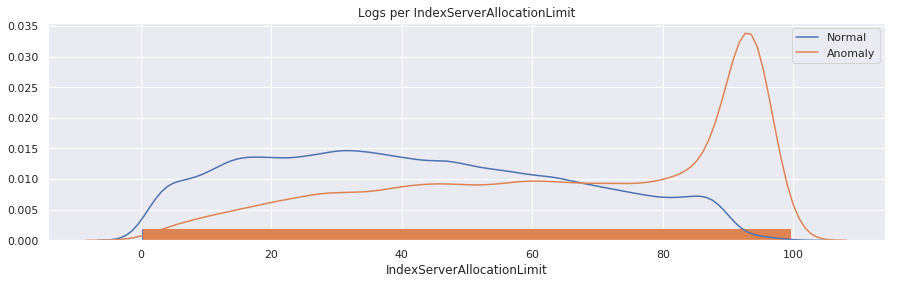

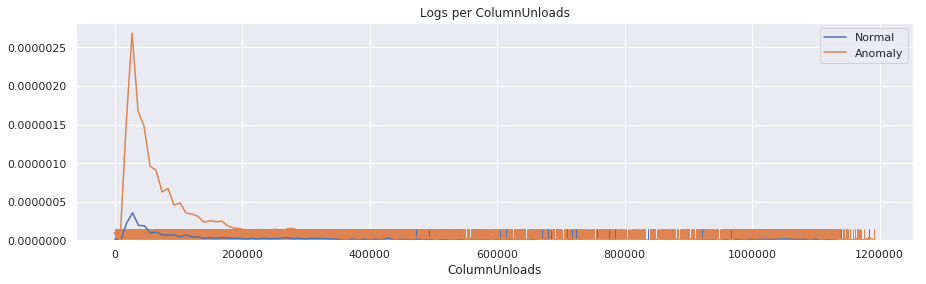

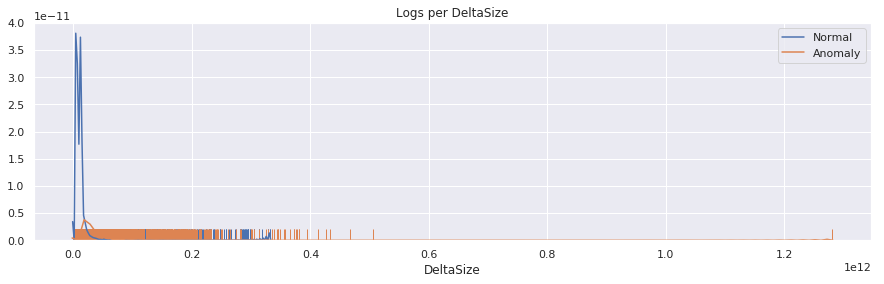

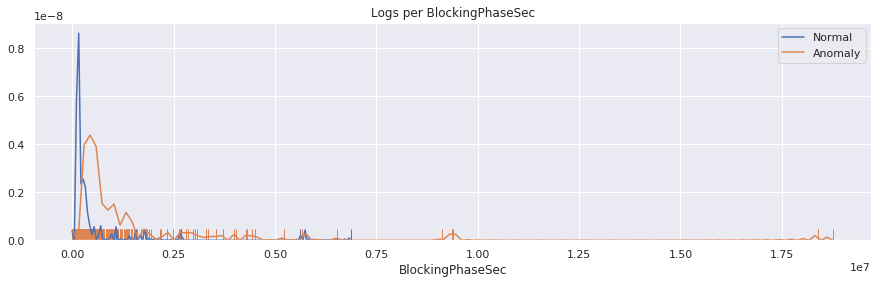

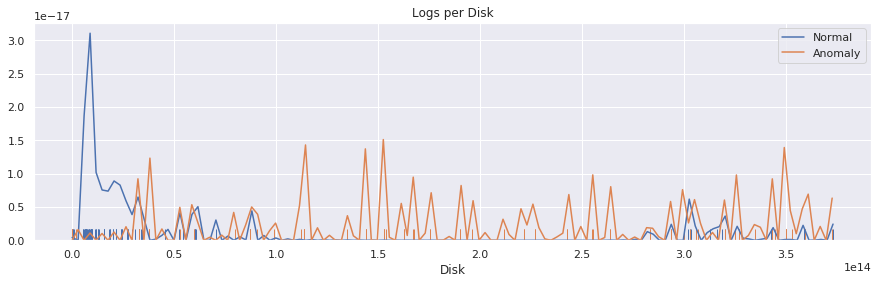

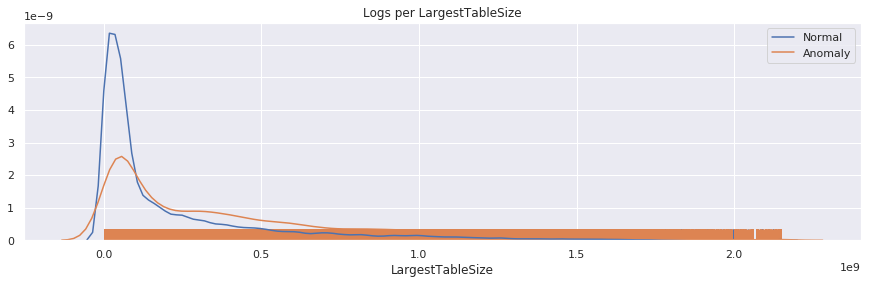

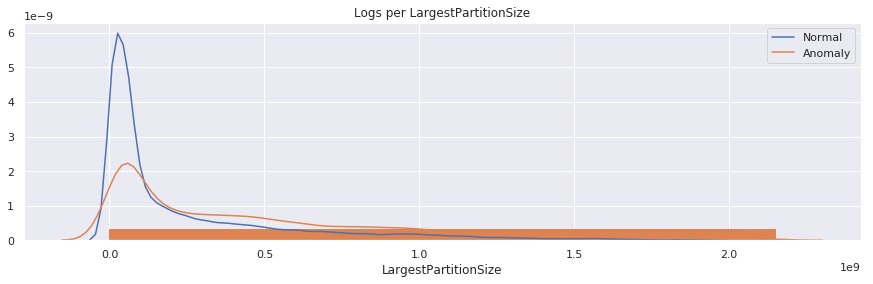

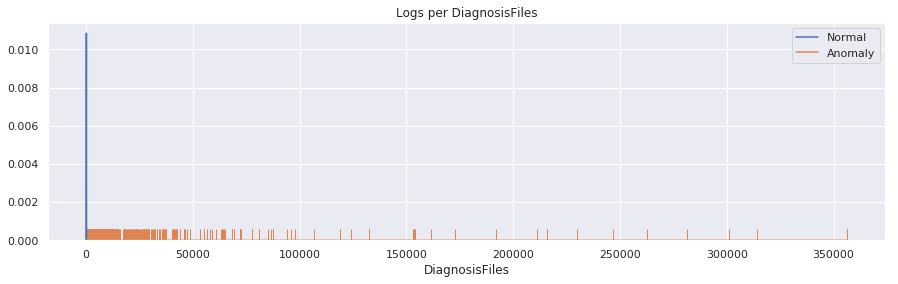

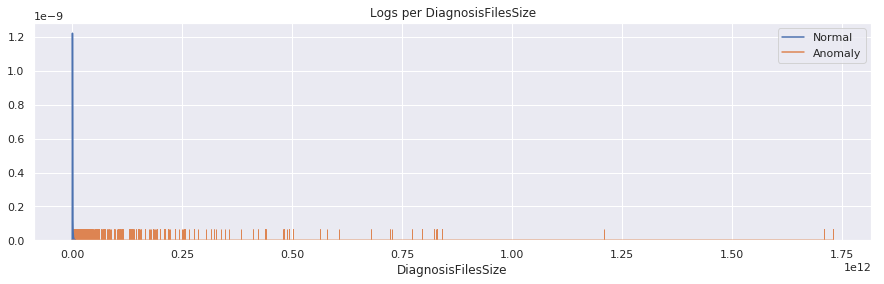

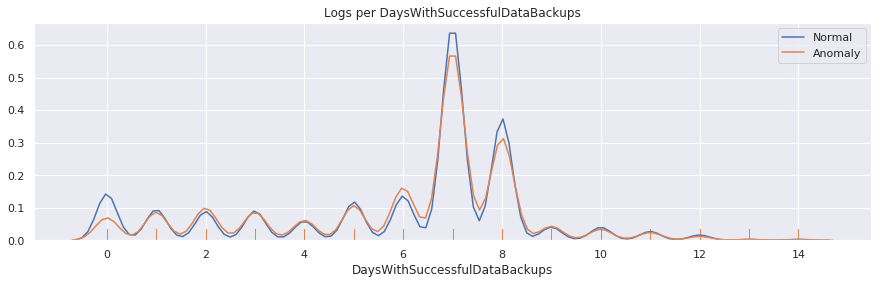

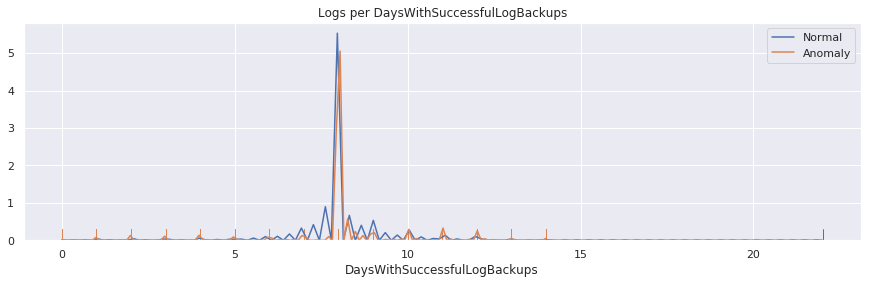

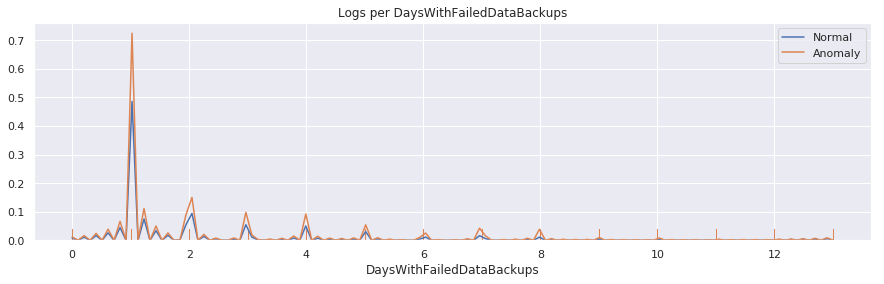

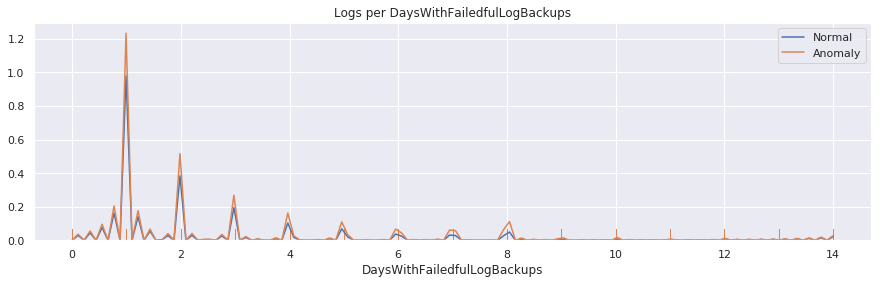

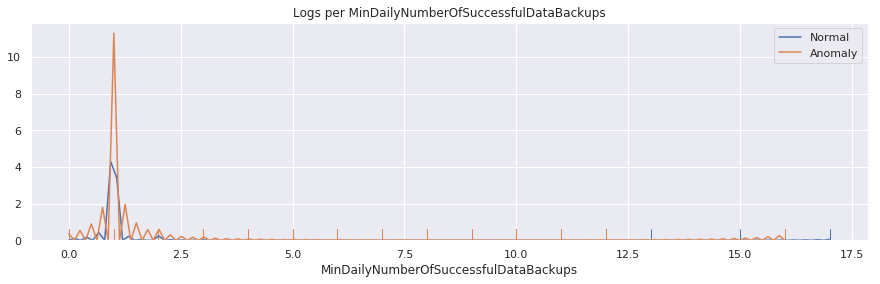

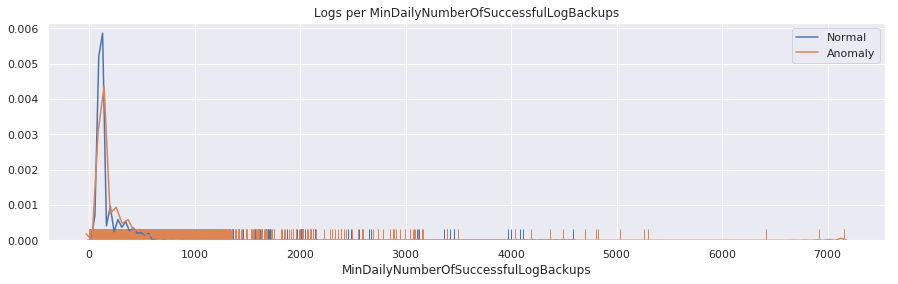

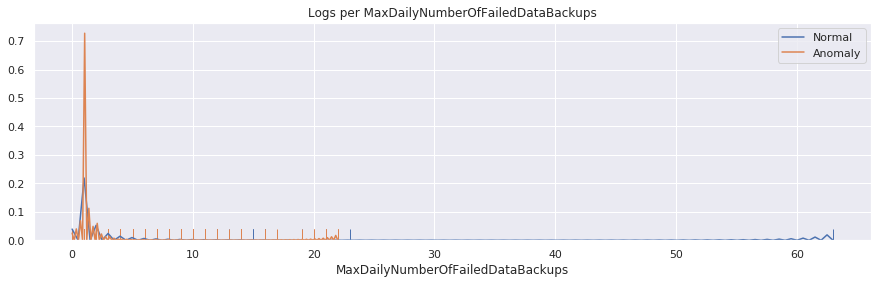

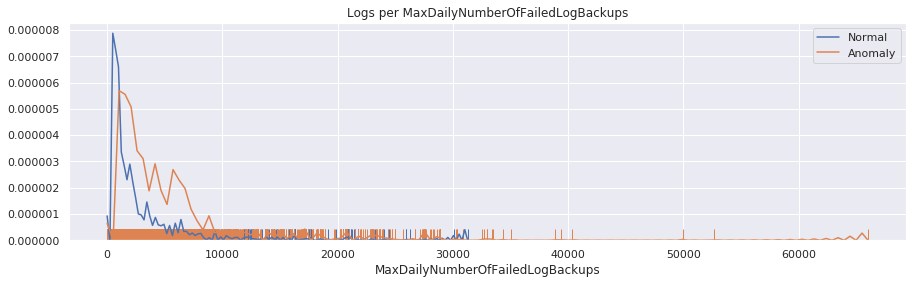

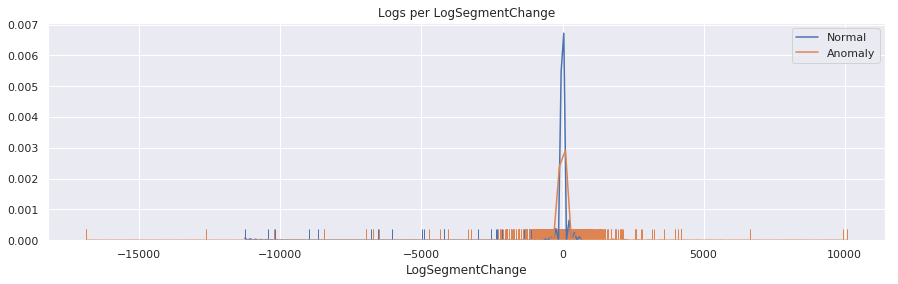

In [22]:
numerical_features = np.array([
    "SessionNumber",
    "SystemID",
    "HighPriorityAlerts",
    "Dumps",
    "CompositeOOMDums",
    "IndexServerRestarts",
    "NameServerRestarts",
    "XSEngineRestarts",
    "StatisticsServerRestarts",
    "CPU",
    "PhysMEM",
    "InstanceMEM",
    "TablesAllocation",
    "IndexServerAllocationLimit",
    "ColumnUnloads",
    "DeltaSize",
    "BlockingPhaseSec",
    "Disk",
    "LargestTableSize",
    "LargestPartitionSize",
    "DiagnosisFiles",
    "DiagnosisFilesSize",
    "DaysWithSuccessfulDataBackups",
    "DaysWithSuccessfulLogBackups",
    "DaysWithFailedDataBackups",
    "DaysWithFailedfulLogBackups",
    "MinDailyNumberOfSuccessfulDataBackups",
    "MinDailyNumberOfSuccessfulLogBackups",
    "MaxDailyNumberOfFailedDataBackups",
    "MaxDailyNumberOfFailedLogBackups",
    "LogSegmentChange",
])

for f in numerical_features:
    logs_per_f(f, graph_type="dist", figsize=(15,4))


Check these graphs give us below observations:
- Ouliers indicate anomalies: HighPriorityAlerts, Dumps, CompositeOOMDums, IndexServerRestarts, NameServerRestarts, XSEngineRestarts, CPU, PhysMEM, DiagnosisFiles, DiagnosisFilesSize. However some of them are the results of others, such as the number of high priority alerts or the number of server restarts. It will be more useful if we know why there are many alerts or restarts. In this group we put high priority on features **Dumps, CompositeOOMDums, CPU, PhysMEM, DiagnosicFiles**
- Two distributions have similar shapes but the anomaly one has higher probability: StatisticsServerRestarts, ColumnUnloads, MaxDailyNumberOfFailedDataBackups. It makes sence because these features has a strong relation to anomalies. 
- Two distributions are skewed in two different directions indicates that higher value leads to higher anomaly probability: **InstanceMEM, TablesAllocation, IndexServerAllocationLimit, BlockingPhaseSec, Disk, MaxDailyNumberOfFailedDataBackups**
- Two distributions have similar shapes, normal one has higher probability than anomaly one but it's reserved at the tail of distributions: **LargeTableSize, LargePartitionSize**
- Two distributions have similar shapes: DaysWithSuccessfulDataBackups, DaysWithFailedDataBackups, MaxDailyNumberOfFailedLogBackups. It tells us nothing about anomalies.


<div class="">
    <h3>3.2. Different types of anomaly Analysis</h3>
</div>

In this section we will analyse the role of features on different types of anomaly.

#### * Non numeric features

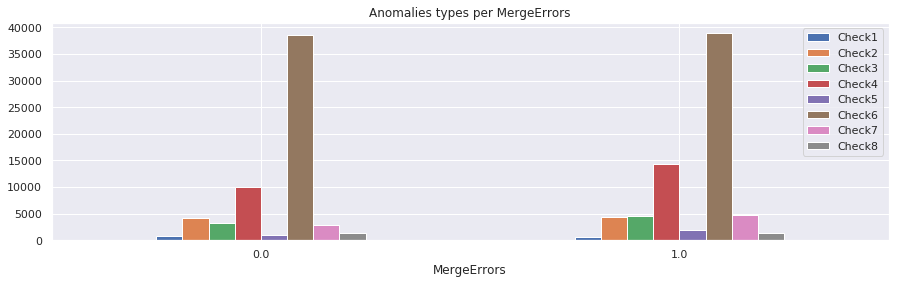

In [23]:
for f in ["MergeErrors"]:
    anomaly_type_per_f(f, "bar", figsize=(15,4))

We observe that there is not much changes in the order of anomaly types between each category of MergeError.

#### * Numeric features

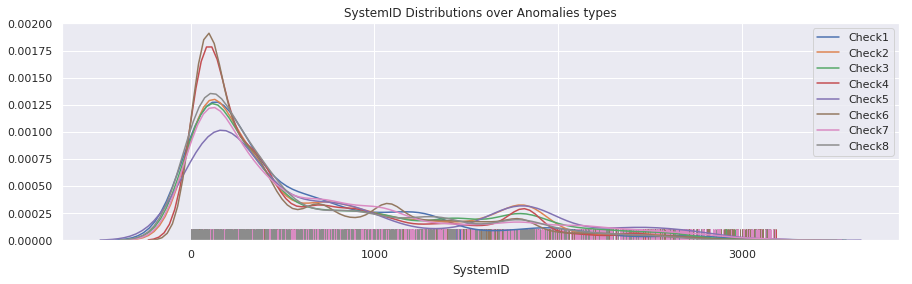

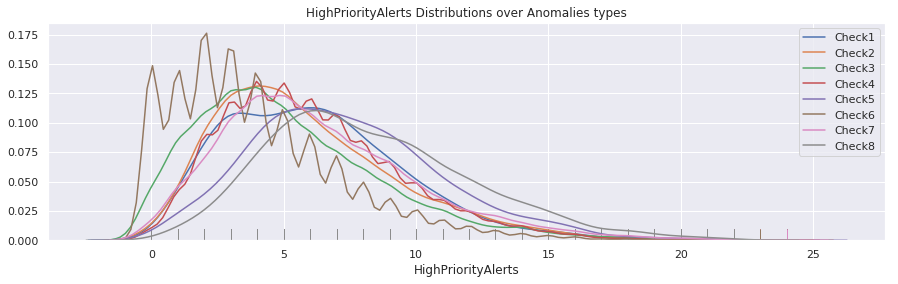

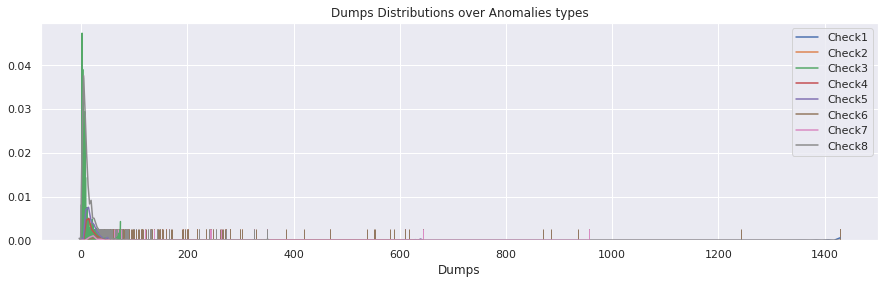

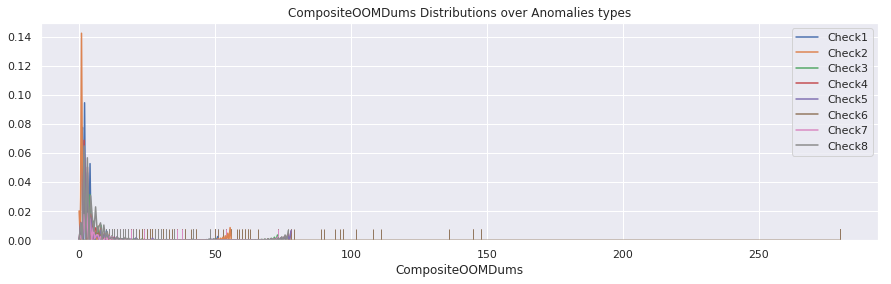

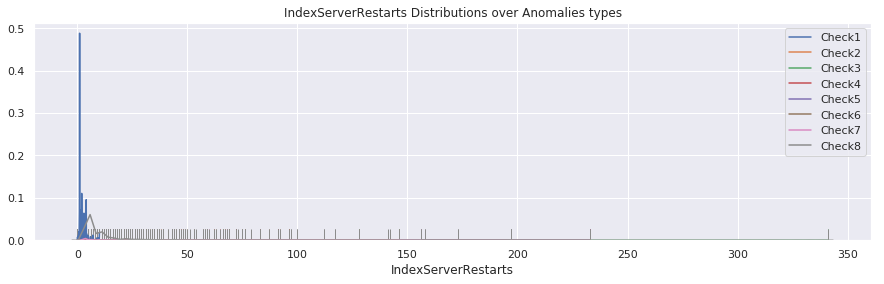

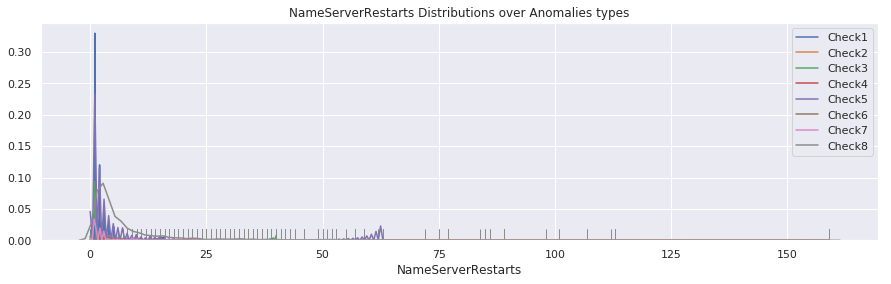

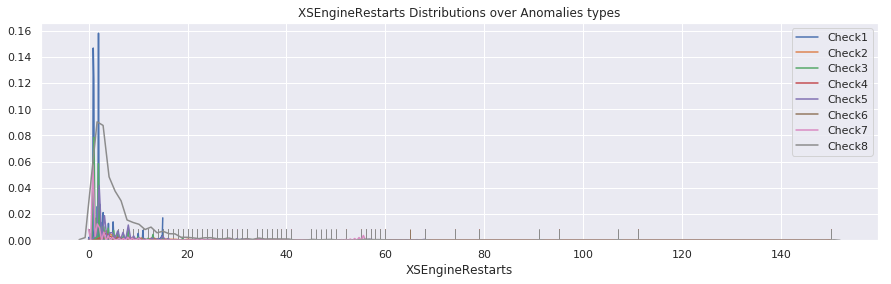

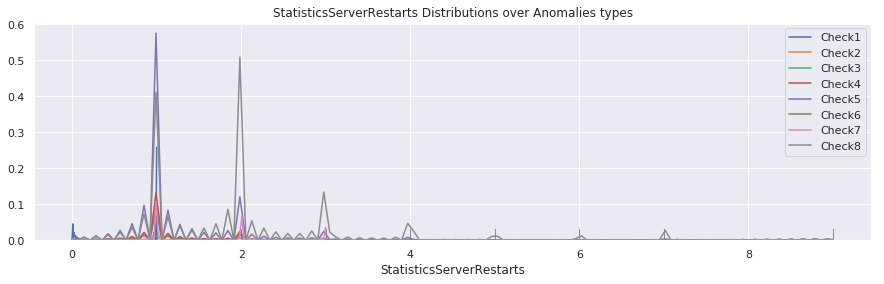

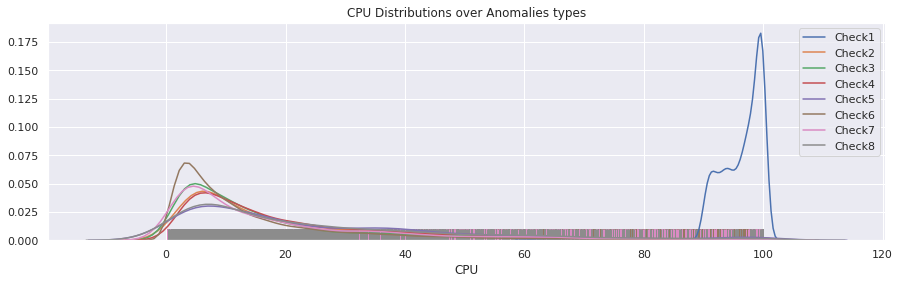

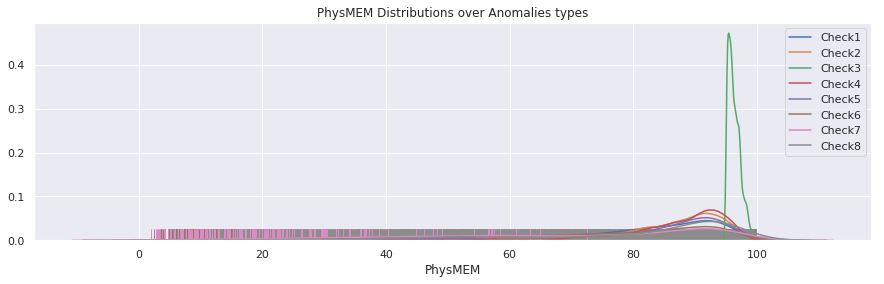

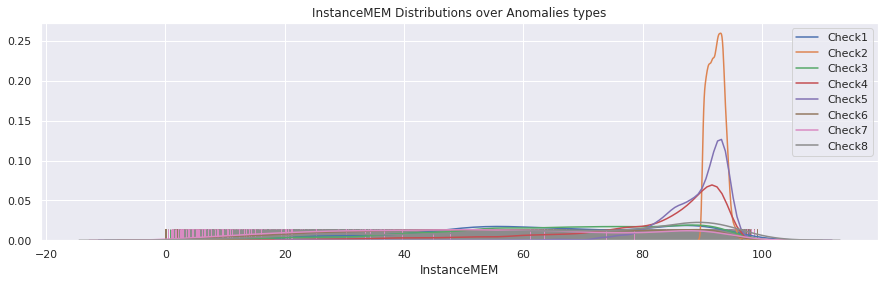

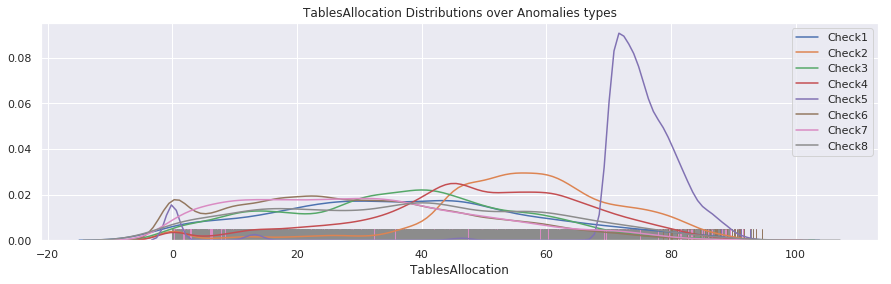

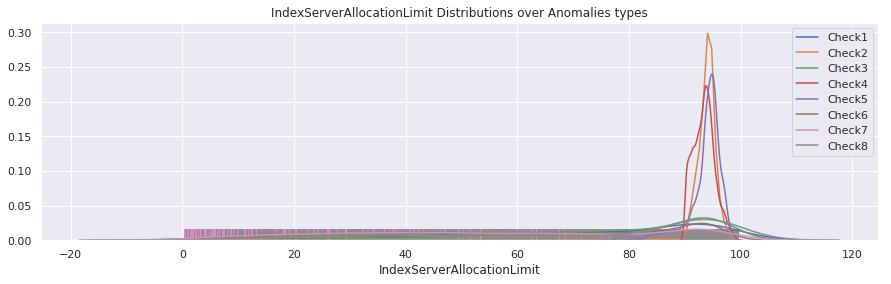

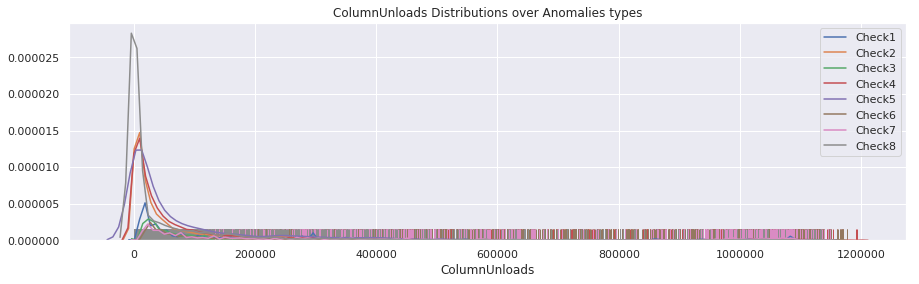

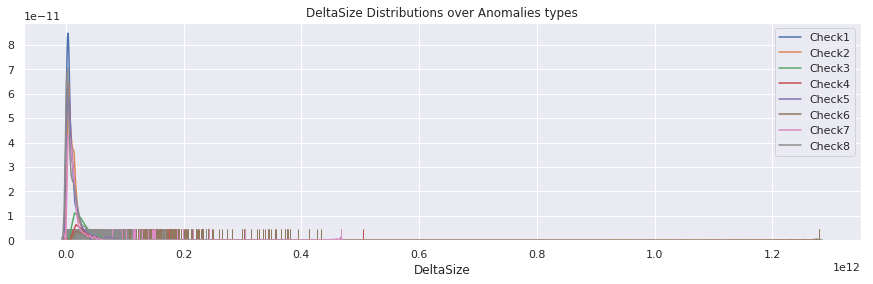

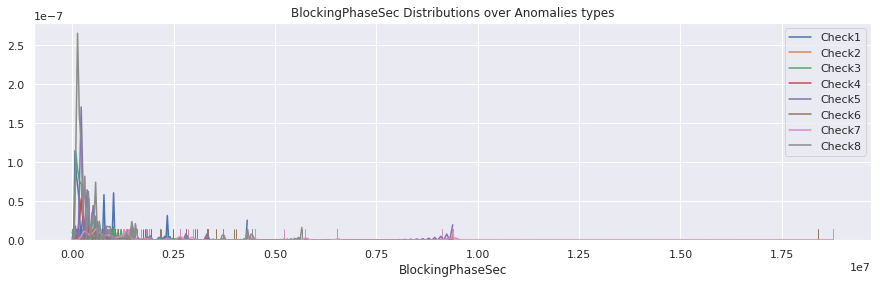

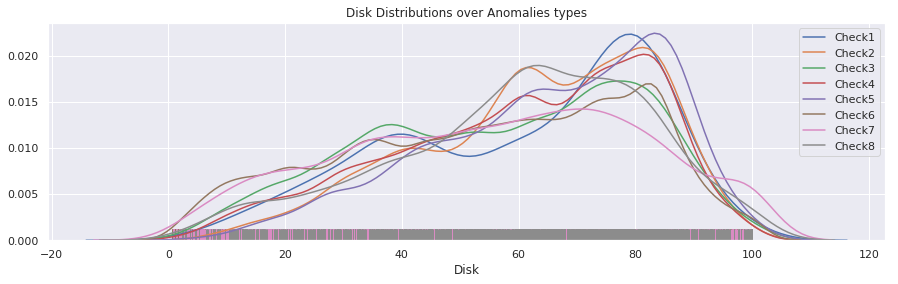

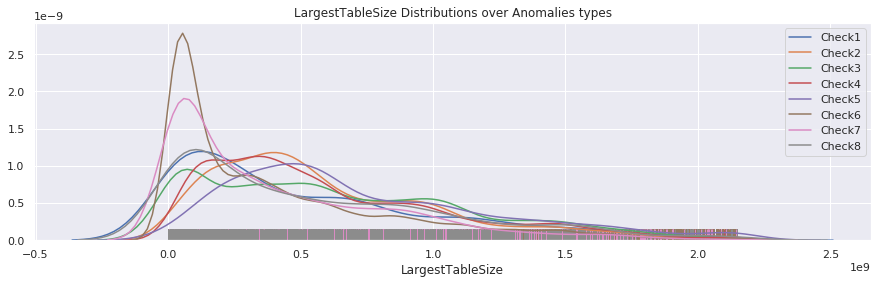

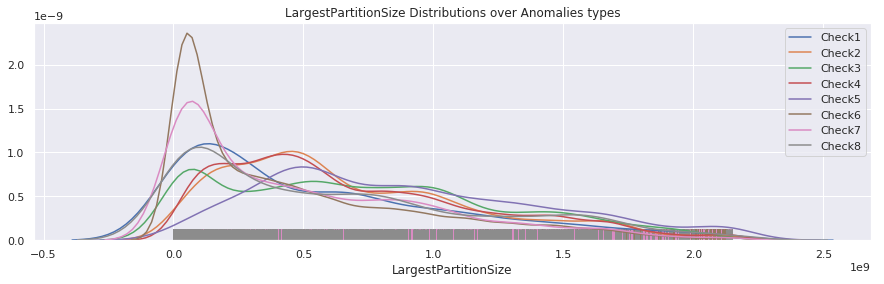

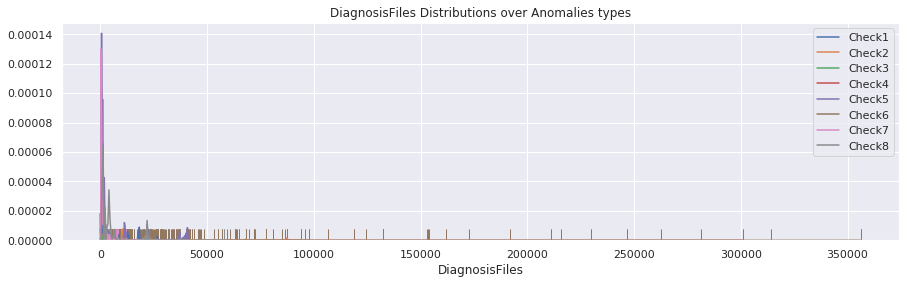

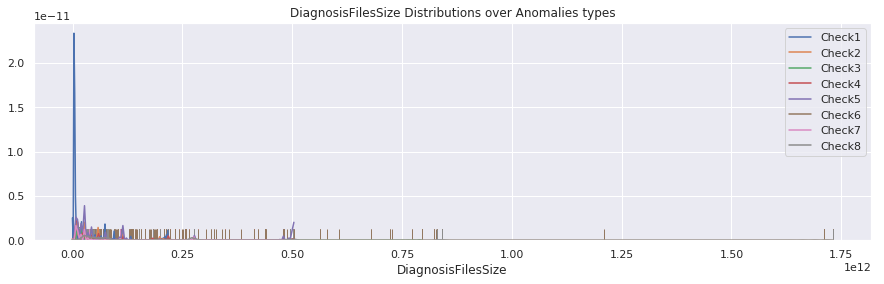

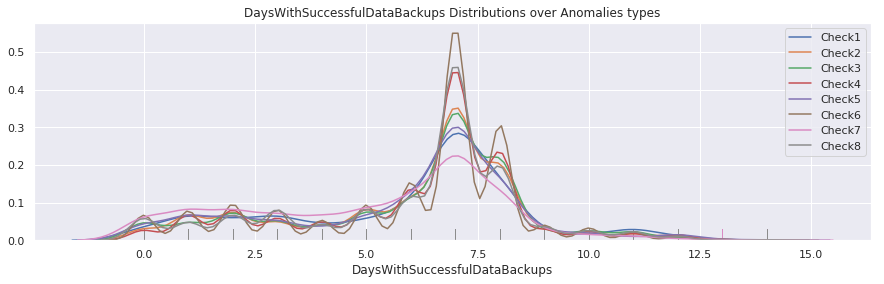

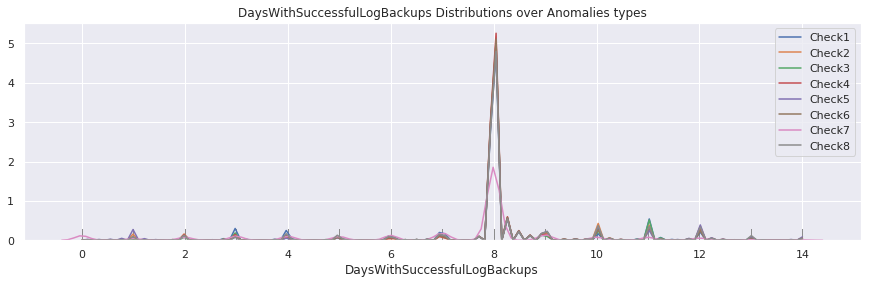

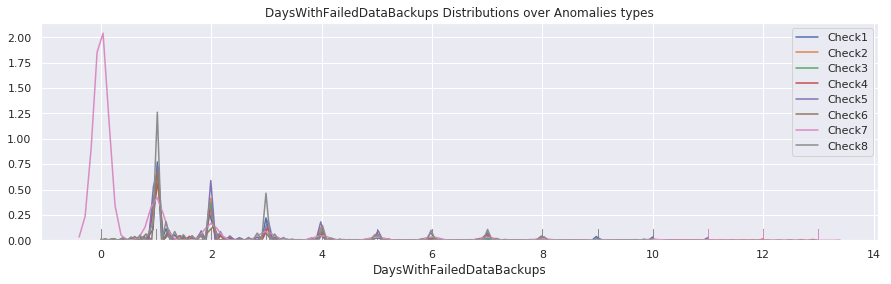

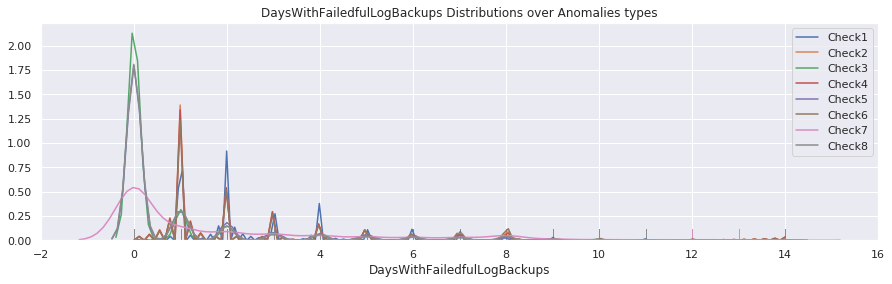

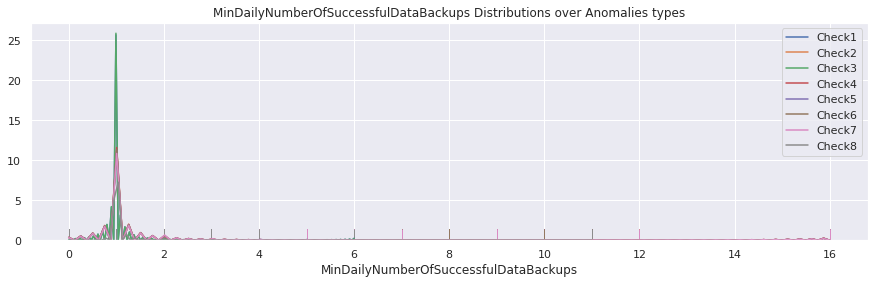

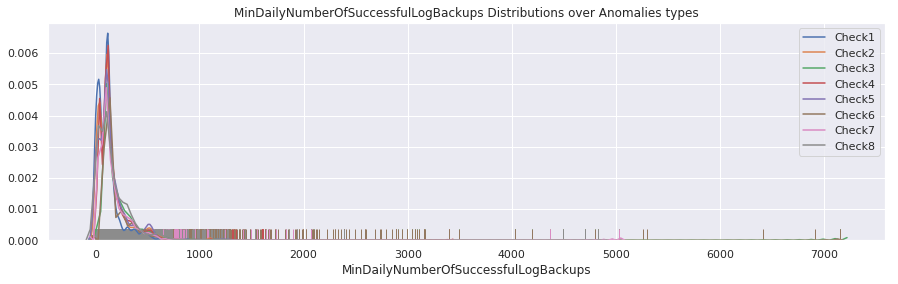

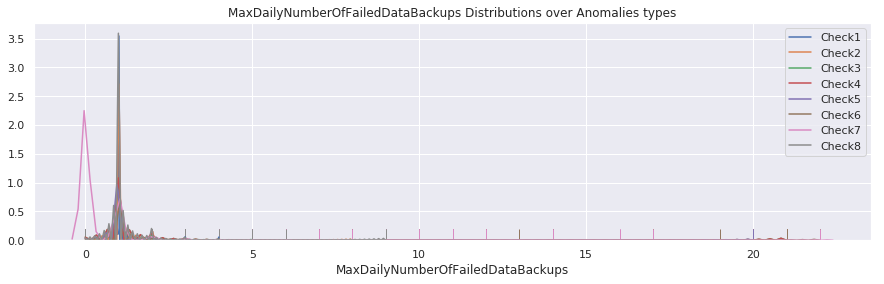

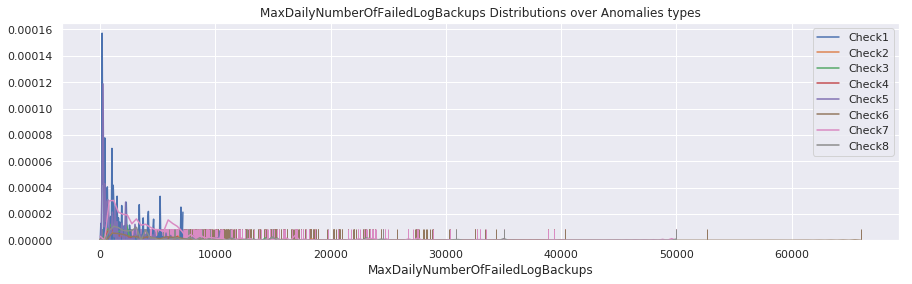

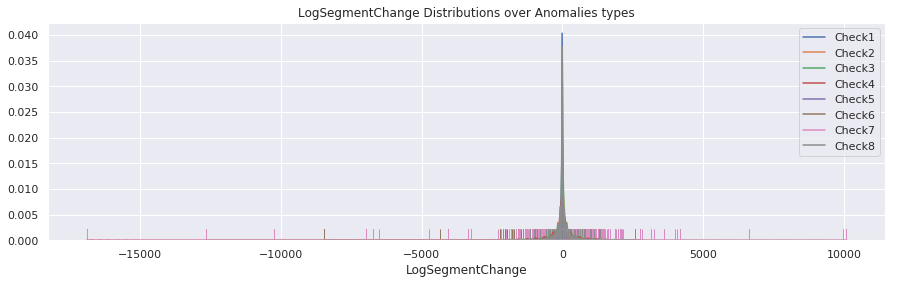

In [24]:
numerical_features = np.array([
    "SystemID",
    "HighPriorityAlerts",
    "Dumps",
    "CompositeOOMDums",
    "IndexServerRestarts",
    "NameServerRestarts",
    "XSEngineRestarts",
    "StatisticsServerRestarts",
    "CPU",
    "PhysMEM",
    "InstanceMEM",
    "TablesAllocation",
    "IndexServerAllocationLimit",
    "ColumnUnloads",
    "DeltaSize",
    "BlockingPhaseSec",
    "Disk",
    "LargestTableSize",
    "LargestPartitionSize",
    "DiagnosisFiles",
    "DiagnosisFilesSize",
    "DaysWithSuccessfulDataBackups",
    "DaysWithSuccessfulLogBackups",
    "DaysWithFailedDataBackups",
    "DaysWithFailedfulLogBackups",
    "MinDailyNumberOfSuccessfulDataBackups",
    "MinDailyNumberOfSuccessfulLogBackups",
    "MaxDailyNumberOfFailedDataBackups",
    "MaxDailyNumberOfFailedLogBackups",
    "LogSegmentChange",
])

for f in numerical_features:
    anomaly_type_per_f(f, graph_type="dist", figsize=(15,4))


We focus on features which have an outstand distribution on a particular type of anomaly compared to others such as:
- CPU: Check1
- PhysMEM: Check3
- InstanceMEM: Check2, Check5, Check4
- TablesAllocation: Check5
- IndexServerAllocationLimit: Check2, Check5, Check4
- DiagnosicFiles: Check6
- DiagnosicFilesSize: Check6
- DaysWithFailedDataBackups: Check7
- DaysWithFailedfulLogBackups: Check7
- MinDailyNumberOfSuccessfulLogBackups: Check6
- MaxDailyNumberOfFailedDataBackups: Check7
- LogSegmentChange: Check7
- IndexServerRestarts: Check8 
- NameServerRestarts: Check8

<div class="">
    <h3>4. Correlation</h3>
</div>

We check correlation between features and features as well as features and labels

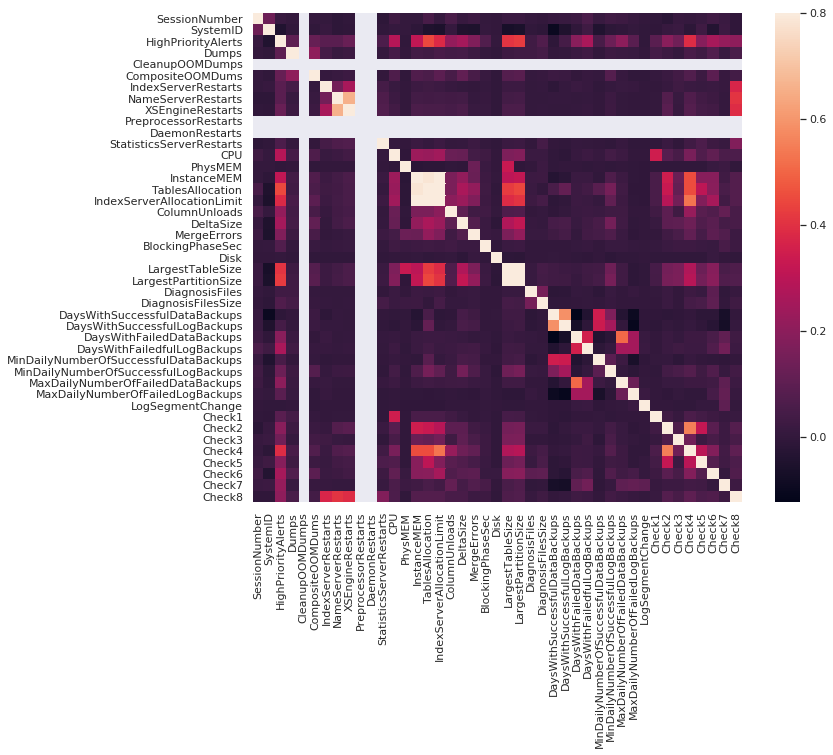

In [25]:
#correlation
correlation_matrix = data.corr()

fig = plt.figure(figsize=(12,9))

sns.heatmap(correlation_matrix,vmax=0.8,square = True)

plt.show()

We observe that there are some strong correlation between:
- PreprocessorRestarts, DaemonRestarts: it has no meaning because they are all 0 as we checked in previous parts.
- InstanceMEM, TablesAllocation, IndexServerAllocationLimit: let's plot them in pairs.


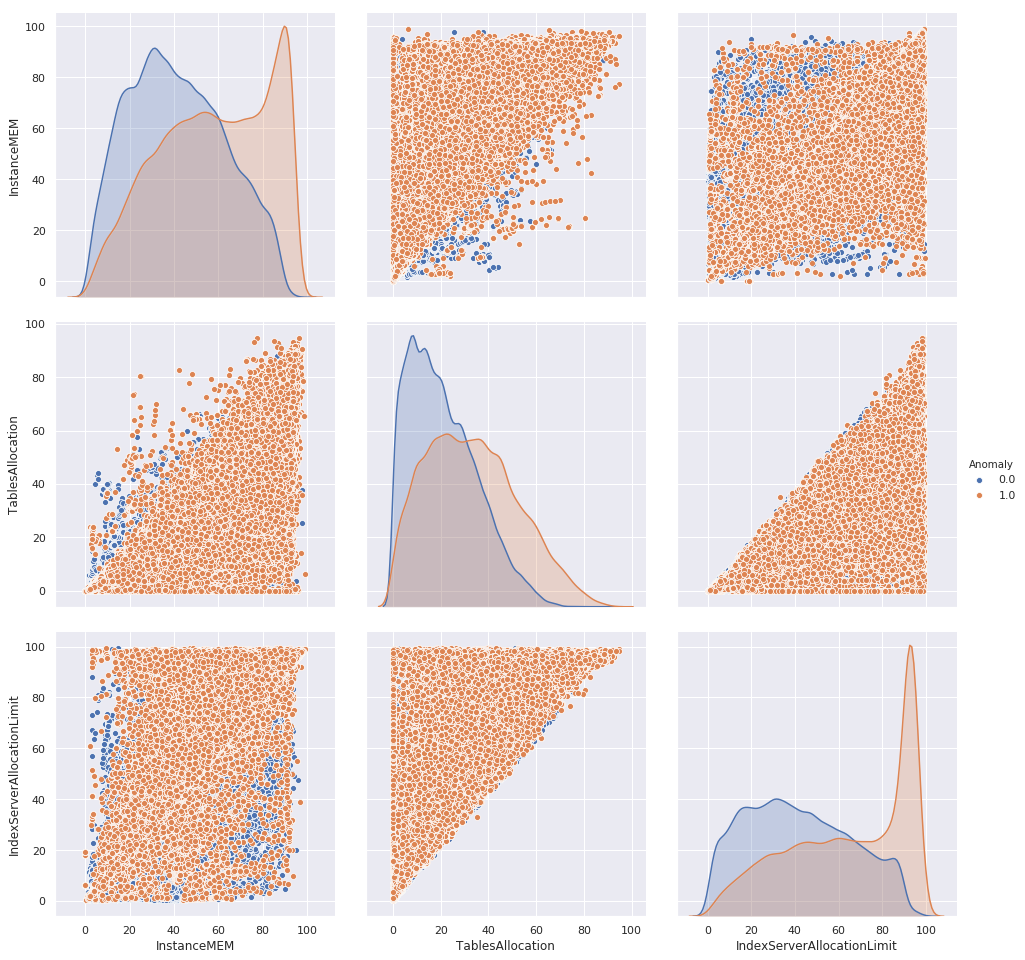

In [26]:
tmp_f_data = pd.DataFrame()
tmp_f_data['Anomaly'] = data.iloc[:,36:44].max(axis=1)
cols = ['InstanceMEM', 'TablesAllocation', 'IndexServerAllocationLimit']
for c in cols:
    tmp_f_data[c] = data[c]
sns.pairplot(tmp_f_data.dropna(), hue="Anomaly", vars=cols, size = 4.5)
plt.show();

At the end of data analysis process, we understand our data and have ideas about features which indicate anomalies as well as features which are able to classify different types of anomaly.


# Data Pre-processing
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

This section includes some basic required pre-processing for the data:
- Handling missing information in the dataset
- Carrying out feature selection

<div class="">
    <h3>1. Handle missing values</h3>
</div>

Check how many missing values we have in the data. We create new column named **Anomaly** which equals to 1 when there is at least one anomaly detection, 0 otherwise.

In [27]:
data["Anomaly"] = data.iloc[:,36:44].max(axis=1)

List out most missing-value columns:

In [28]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

Total   Percent
BlockingPhaseSec               75854  0.264271
Check4                         36647  0.127676
Check7                         35722  0.124453
LogSegmentChange               35549  0.123851
Check5                         35034  0.122057
IndexServerAllocationLimit     26444  0.092129
CPU                            25209  0.087827
Check1                         24511  0.085395
Check2                         24486  0.085308
Check3                         22568  0.078626
InstanceMEM                    22117  0.077054
DiagnosisFiles                 21923  0.076379
DiagnosisFilesSize             21923  0.076379
PhysMEM                        20567  0.071654
LargestTableSize               16250  0.056614
Disk                           11379  0.039644
MergeErrors                     7733  0.026941
Check6                          7384  0.025725
TablesAllocation                2290  0.007978
DeltaSize                        206  0.000718
LargestPartitionSize             150  0.000523
Check8                            52  0.000181
Anomaly                           52  0.000181
Dumps                              3  0.000010
CleanupOOMDumps                    3  0.000010
CompositeOOMDums                   3  0.000010
DaysWithSuccessfulDataBackups      0  0.000000
DaysWithSuccessfulLogBackups       0  0.000000
SystemID                           0  0.000000
Date                               0  0.000000

We will delete 52 records which have no information about any labels (NaN for all labels)

In [29]:
data = data.dropna(subset=['Anomaly'])

#### * Categorical features

For MergeErrors, if the record is an anomaly we put it as 1 (the most frequently value), 0 otherwise.

In [30]:
f = "MergeErrors"

data[f] = data[f].fillna(data["Anomaly"])

print("MergeErrors missing values:", data[f].isnull().sum())

MergeErrors missing values: 0


#### * Numeric features

For numerical features, if the record is an anomaly we replace it by the median of anomaly values, otherwise by median of normal values.

In [31]:
nan_features = ['BlockingPhaseSec',
                'LogSegmentChange', 
                'IndexServerAllocationLimit', 
                'CPU',
                'InstanceMEM', 
                'DiagnosisFiles', 
                'DiagnosisFilesSize', 
                'PhysMEM',
                'LargestTableSize', 
                'Disk', 
                'TablesAllocation',
                'DeltaSize', 
                'LargestPartitionSize', 
                'Dumps',
                'CleanupOOMDumps', 
                'CompositeOOMDums']

for f in nan_features:
    data.loc[data["Anomaly"] == 1. , f] = data.loc[data["Anomaly"] == 1. , f].fillna(data.loc[data["Anomaly"] == 1. , f].median())
    data.loc[data["Anomaly"] == 0. , f] = data.loc[data["Anomaly"] == 0. , f].fillna(data.loc[data["Anomaly"] == 0. , f].median())

Check missing data again:

In [32]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total   Percent
Check4            36595  0.127518
Check7            35670  0.124295
Check5            34982  0.121897
Check1            24459  0.085229
Check2            24434  0.085142
Check3            22516  0.078459
Check6             7332  0.025549
Anomaly               0  0.000000
XSEngineRestarts      0  0.000000
TablesAllocation      0  0.000000

From this figure, we see that now missing values are in the labels only. The number of records are large compared to number of anomaly records, and we know that this is a multi-label problem, we should not drop them. 

In [33]:
# fill 0 for na
data = data.fillna(0)

Check missing data again:

In [34]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)

percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

Total  Percent
Anomaly               0      0.0
BlockingPhaseSec      0      0.0
DeltaSize             0      0.0

<div class="">
    <h3>2. Features selection</h3>
</div>

As mentioned in section 1, there are some features which have uniform distribution or their distribution over different types of anomaly are similar. They have no role in this anomaly detection problem. We will remove them. We also remove the custom column Anomaly.

In [35]:
data = data.drop(['Date', 'SessionNumber', 'SystemID', 'CleanupOOMDumps', 'PreprocessorRestarts', 'DaemonRestarts', 'Anomaly'], axis=1)

<div class="">
    <h3>3. Data split</h3>
</div>

In [45]:
# df = data.drop(['Anomaly'], axis = 1)
# df = data
y = data[labels]
df = data.drop(labels, axis=1)

feature_names = df.columns.values

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.8, test_size=0.2, stratify=y["Check1"])

# Model Selection
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

In this section, we find suitable models and do experiments on them.

Our problem is a multi-label classification with a moderate correlation between 2 of 8 labels. There are 2 main approaches to resolve such problems:

**Algorithm adaptation methods:** we treat the whole problem with a specific algorithm. It means that each combination of labels becomes a new target.

**Problem transformation methods:** transform the multi-label problems into multi single-label problems.
- Binary relevance
- Classifier chains

We will try both approaches and compare the results. For each approach, we choose **DecisionTree** as the core model to build because its advantages as below:
- Simple to understand and to interpret. Trees can be visualised.
- Requires little data preparation. It doesn't require data normalisation or dummy variables creation.
- Able to handle both numerical and categorical data.
- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic.
- Support multi-label classification
- Be able to predict the probability of the classes. It provides the knowledge about the confidence and helps users in making decision with the prediction.


In [47]:
# Import necessary packages
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain
from sklearn.metrics import f1_score, accuracy_score
import sklearn.metrics

<div class="">
    <h3>1. Single multi-label classifier</h3>
</div>

In this approach, we treat each combination of labels as a target. It takes account the correlation between labels, however the number of classes can be up to $$2^n$$ with n is the number of labels, which results 256 classes in this problem.

We need to convert the labels into matrix.

In [69]:
y_train_m = y_train.as_matrix()
y_test_m = y_test.as_matrix()

<div class="">
    <h4>1.1. Model Training</h4>
</div>

As observed from previous sections, there are around 15 features which plays important roles in anomaly detection. We limit the max depth to 15 also to reduce the overfitting on training process.

In [70]:
model = DecisionTreeClassifier(max_depth=15)
model.fit(X_train, y_train_m)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<div class="">
    <h4>1.2. Model Evaluation</h4>
</div>

We evaluate the performance of model based on its prediction on test dataset.

In [71]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test_m, y_pred)  
f1 = f1_score(y_test, y_pred, average='macro')  
print("accuracy score: ", acc)
print("f1 score: ", f1)

accuracy score:  0.9768276534950171
f1 score:  0.925705740115013


It results good predictions. Let's check the complexity of the model.

In [78]:
print("Number of features: ", model.n_features_)
print("Number of nodes: ", model.tree_.node_count)
print("Length: ", model.tree_.max_depth)

Number of features:  30
Number of nodes:  3303
Length:  15


The model is highly complex with 3303 nodes and max depth of 15.

<div class="">
    <h4>1.3. Model Interpretation</h4>
</div>

Export the tree graph:

In [79]:
export_graphviz(model, max_depth=3, feature_names=feature_names, filled=True, out_file="single-model.dot")

Because of some problems in the graphviz package install, we render the graphs using an online tool here https://dreampuf.github.io/GraphvizOnline/. 
<div></div>
<b>Single multi-label Model:</b>
<img src="images/s1.png" align="center" alt="">

We observe that this model tries to generalize the problem and it's not easy to extract rules from this decision tree.

<div class="">
    <h3>2. Binary relevance</h3>
</div>

With this algorithm, an ensemble of single-label binary classifiers is trained, one for each label. Each model predicts either the membership or the non-membership of one class. The union of all predicted is taken as the multi-label output. This approach is popular because it is easy to implement, however it ignores the possible correlations between class labels. It's not really a big trouble here because the correlation between our labels are not strong.

<div class="">
    <h4>2.1. Model Training</h4>
</div>

In [80]:
# initialize Binary Relevance multi-label classifier
# with decision tree base classifier
binary_relevance_model = BinaryRelevance(DecisionTreeClassifier(max_depth=15))

# train
binary_relevance_model.fit(X_train, y_train)

BinaryRelevance(classifier=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
        require_dense=[True, True])

<div class="">
    <h4>2.2. Model Evaluation</h4>
</div>

The training time is short (under one minute), however it is longer than single multi-label model. It's because here we actually train 8 seperated models. Now we evaluate the model based on its predictions on test data. 

In [81]:
y_pred = binary_relevance_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred, average='macro')  
print("accuracy score: ", acc)
print("f1 score: ", f1)


accuracy score:  0.9779601365948847
f1 score:  0.9432708379646892


We see that the result is slightly higher than the single multi-label model, especially in the f1 score. The reason is that  in the binary relevance model, each label is a class itself while in the single multilabel model, each combination of labels is a specific class. It means the number of classes in this model is smaller than one in single multi-label model.

Check the model complexity

In [82]:
stats_model = pd.DataFrame(columns=["Model", "Features", "Nodes"])
for i in range(len(labels)):
    label = labels[i]
    stats_model = stats_model.append(
            {'Model': label, 'Features':  binary_relevance_model.classifiers_[i].n_features_, 
             "Nodes": binary_relevance_model.classifiers_[i].tree_.node_count}, 
        ignore_index=True)

display(stats_model)

Model Features Nodes
0  Check1       30   129
1  Check2       30   275
2  Check3       30   505
3  Check4       30   613
4  Check5       30   307
5  Check6       30   487
6  Check7       30  2919
7  Check8       30    13

Each class has its own model with different complexity. Model for label Check8 is the simplest one with only 13 nodes, while the most complex is the model for Check7.

<div class="">
    <h4>2.3. Model Interpretation</h4>
</div>

The interpretability of model is very important in this kind of problem. It's not only about the final decision but also about what leads to that decision. Understanding model helps users find out the root causes of anomalies. Firstly we export the dot graph for each model corresponding to each type of anomaly.

In [84]:
# eport graph for each mod
for i in range(len(labels)):
    label = labels[i]
    model = binary_relevance_model.classifiers_[i]
    file_name = label+"_2.dot"
    export_graphviz(model, max_depth=3, feature_names=feature_names, class_names=["Not-"+label, label],
               filled=True, proportion=True, out_file=file_name)

Let's check the graphs as following:
<div></div>
<b>Model for Check1:</b>

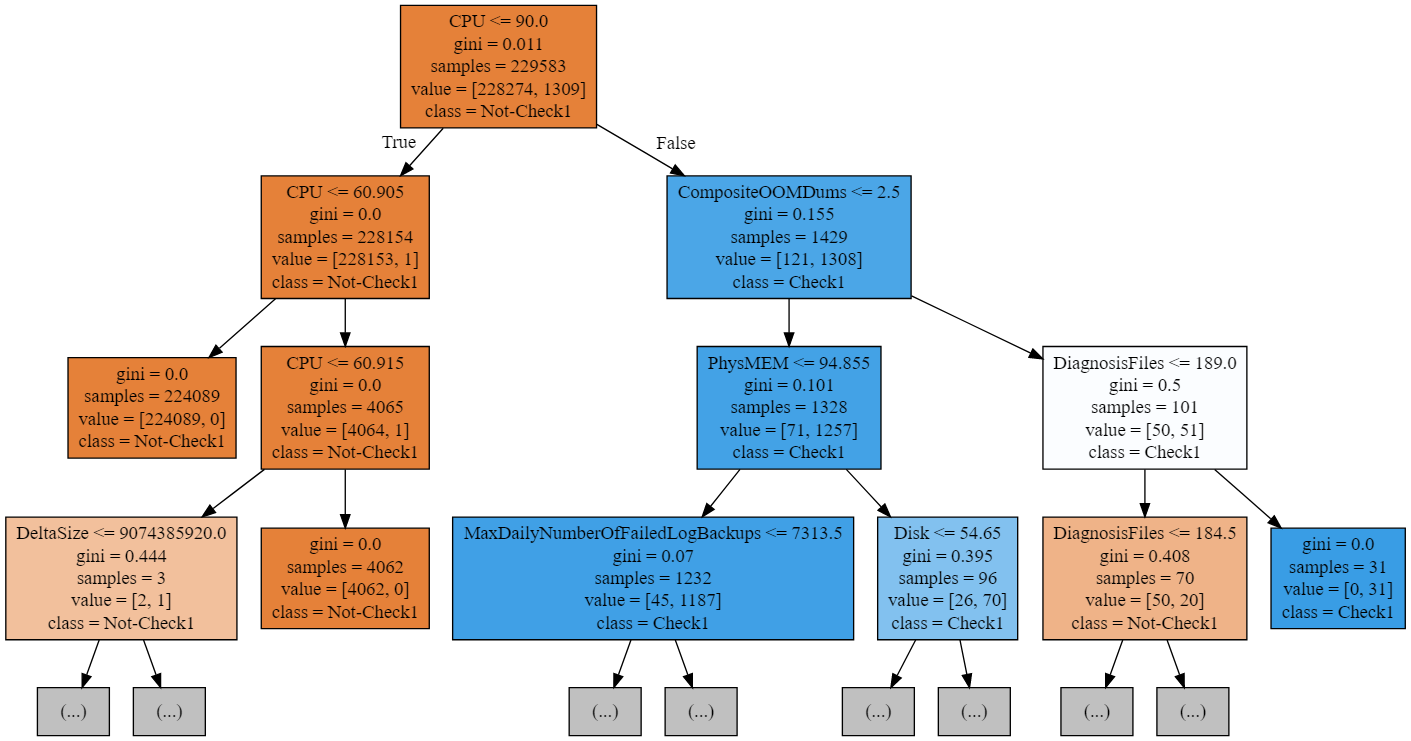

In [109]:
Image(filename="images/m1_3.png")

<b>Model for Check2:</b>

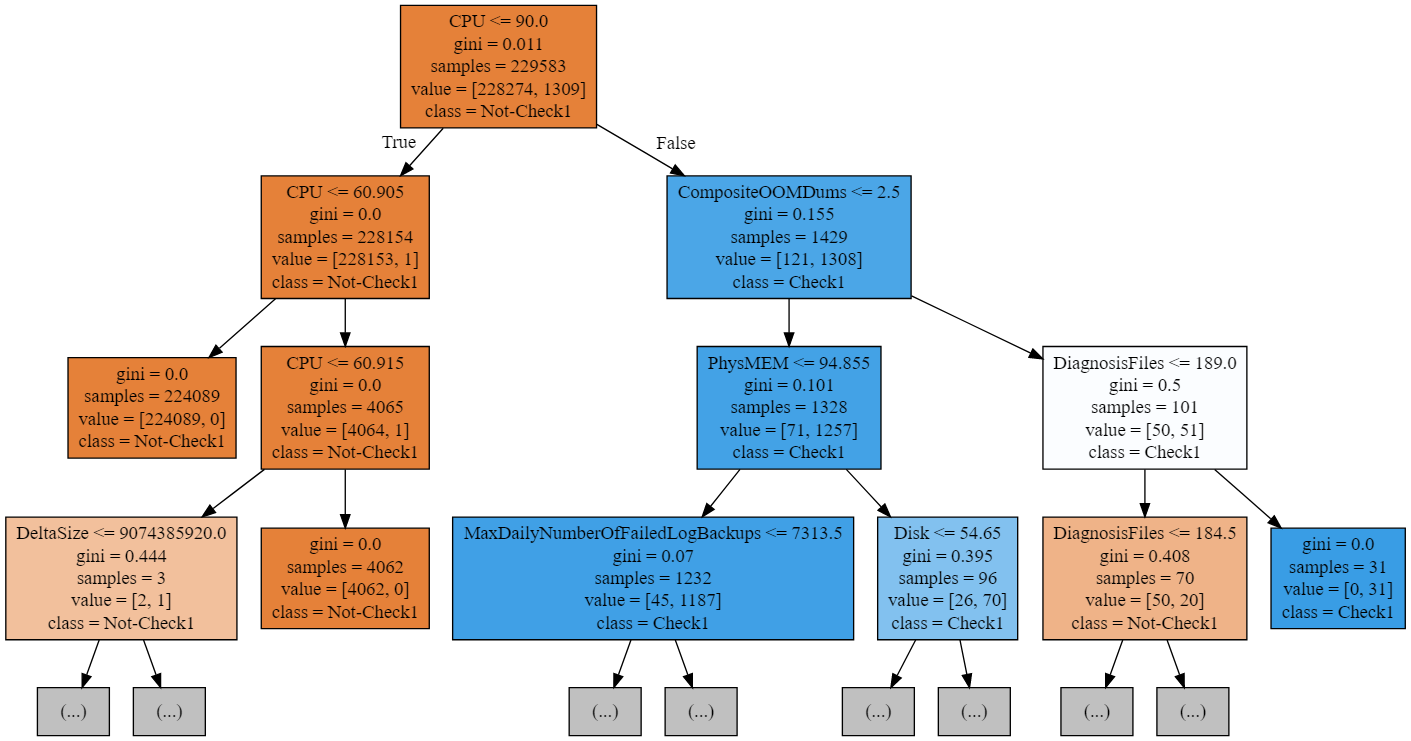

In [109]:
Image(filename="images/m2_3.png")

<b>Model for Check3:</b>

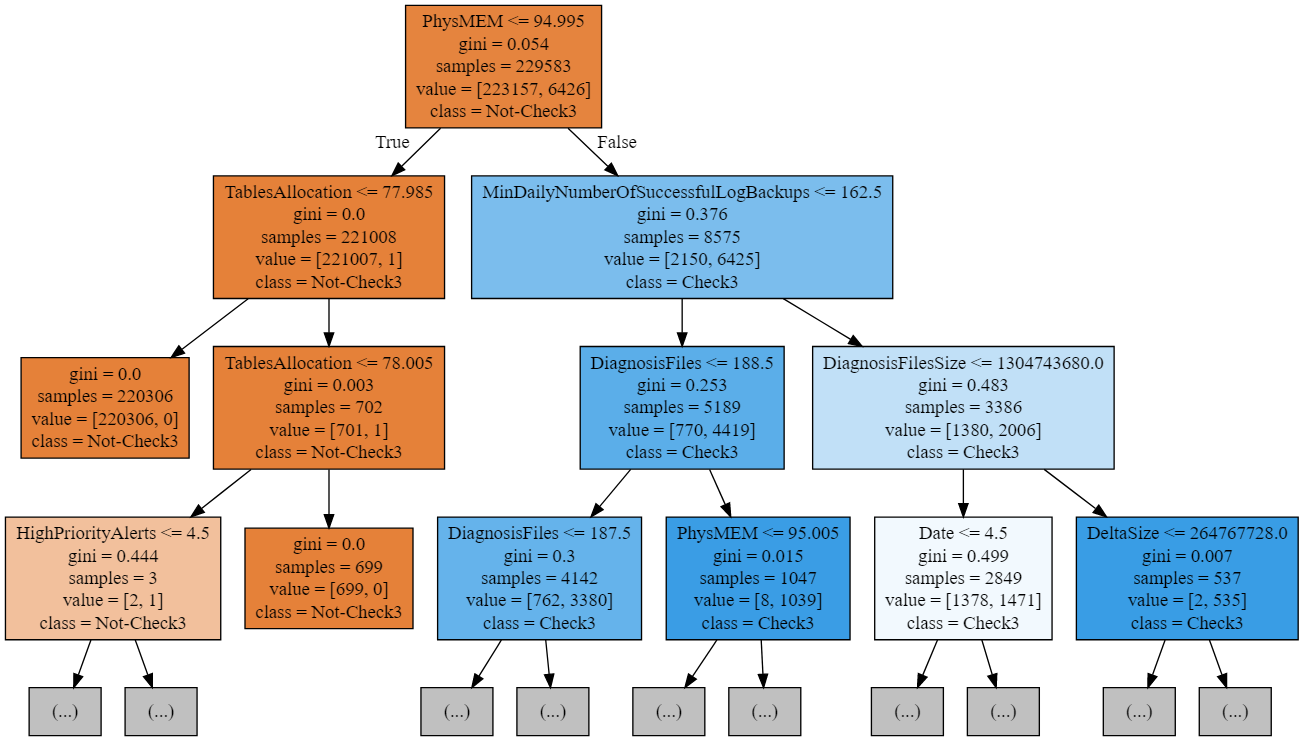

In [110]:
Image(filename="images/m3_3.png")

<b>Model for Check4:</b>

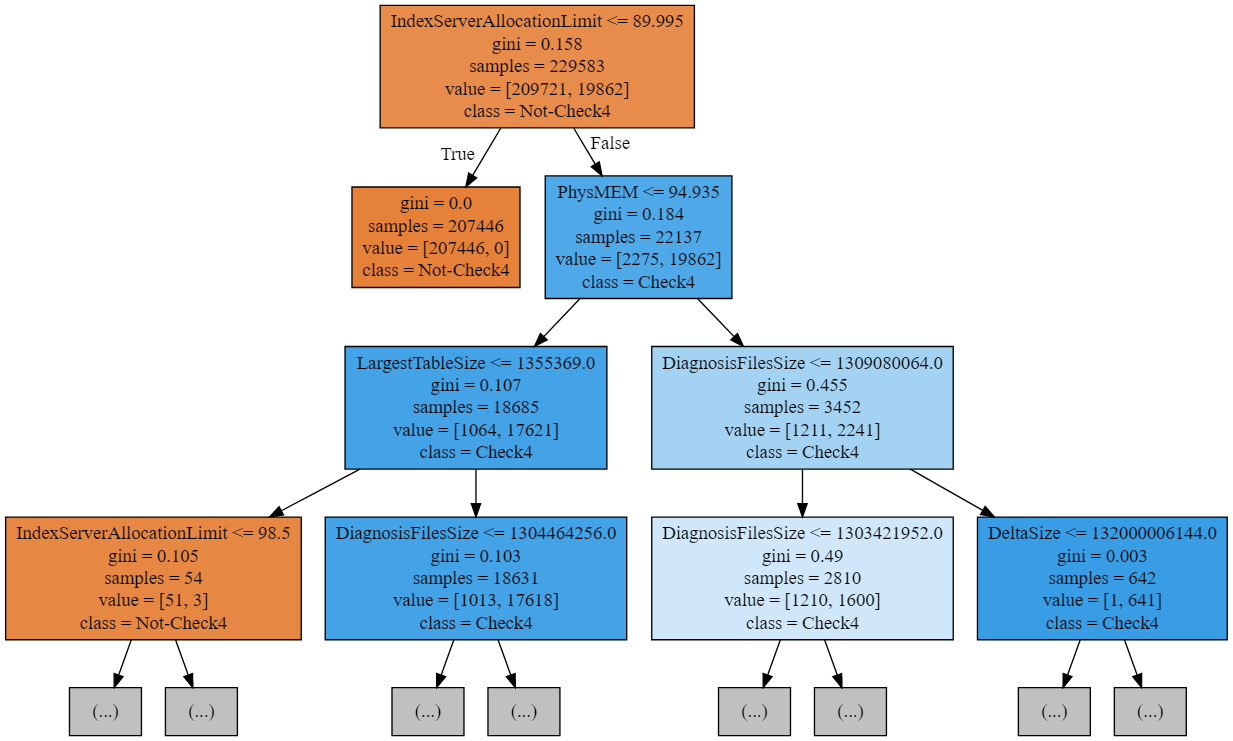

In [111]:
Image(filename="images/m4_3.png")

<b>Model for Check5:</b>

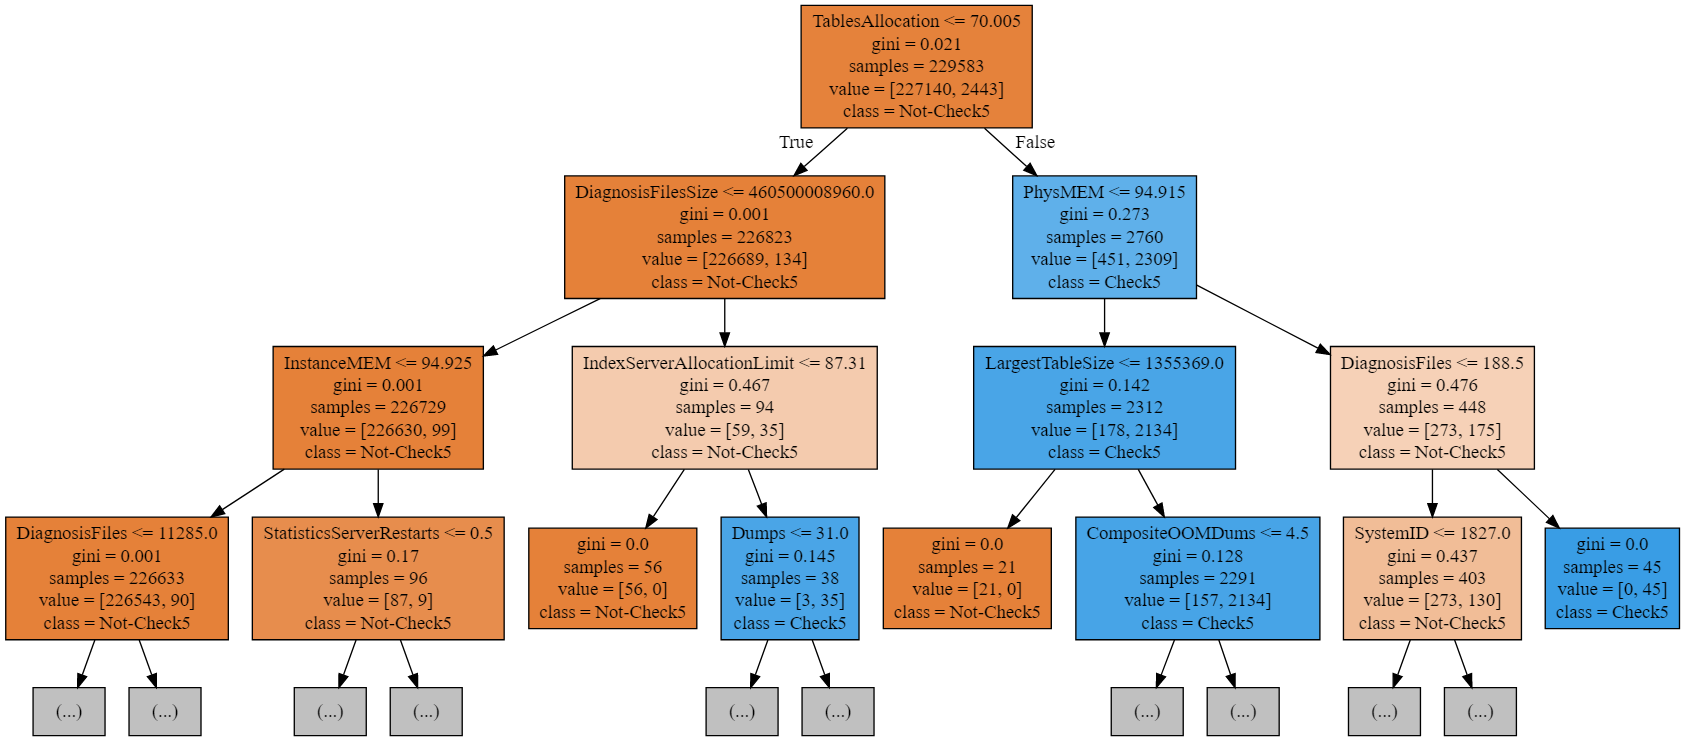

In [112]:
Image(filename="images/m5_3.png")

<b>Model for Check6:</b>

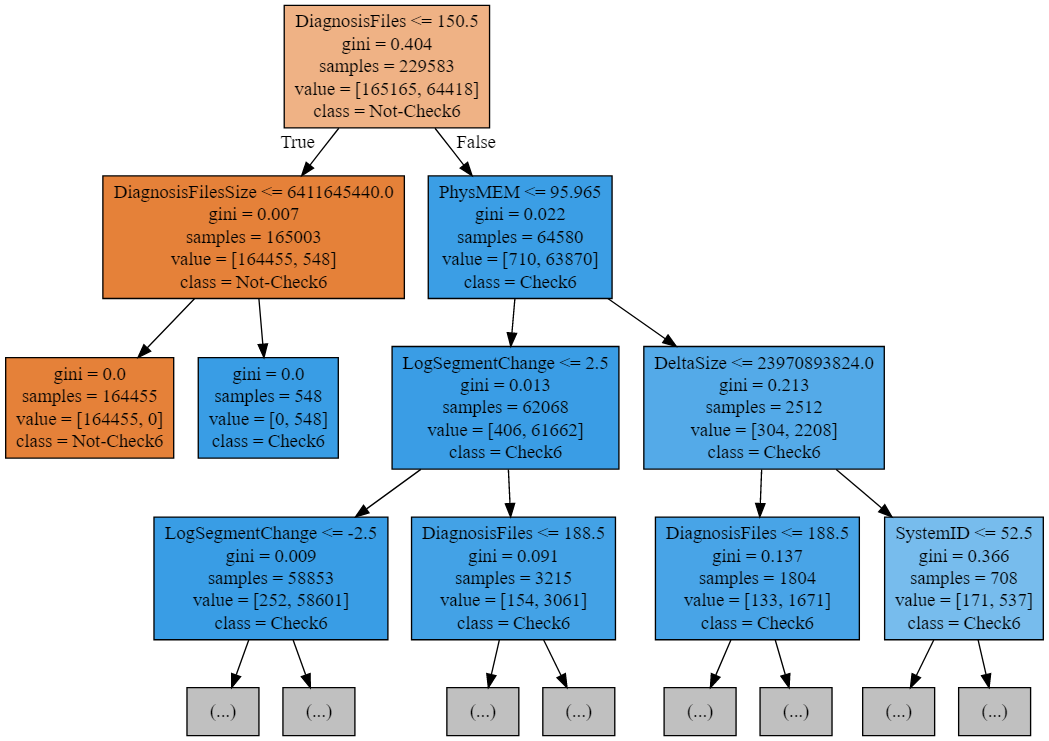

In [113]:
Image(filename="images/m6_3.png")

<b>Model for Check7:</b>

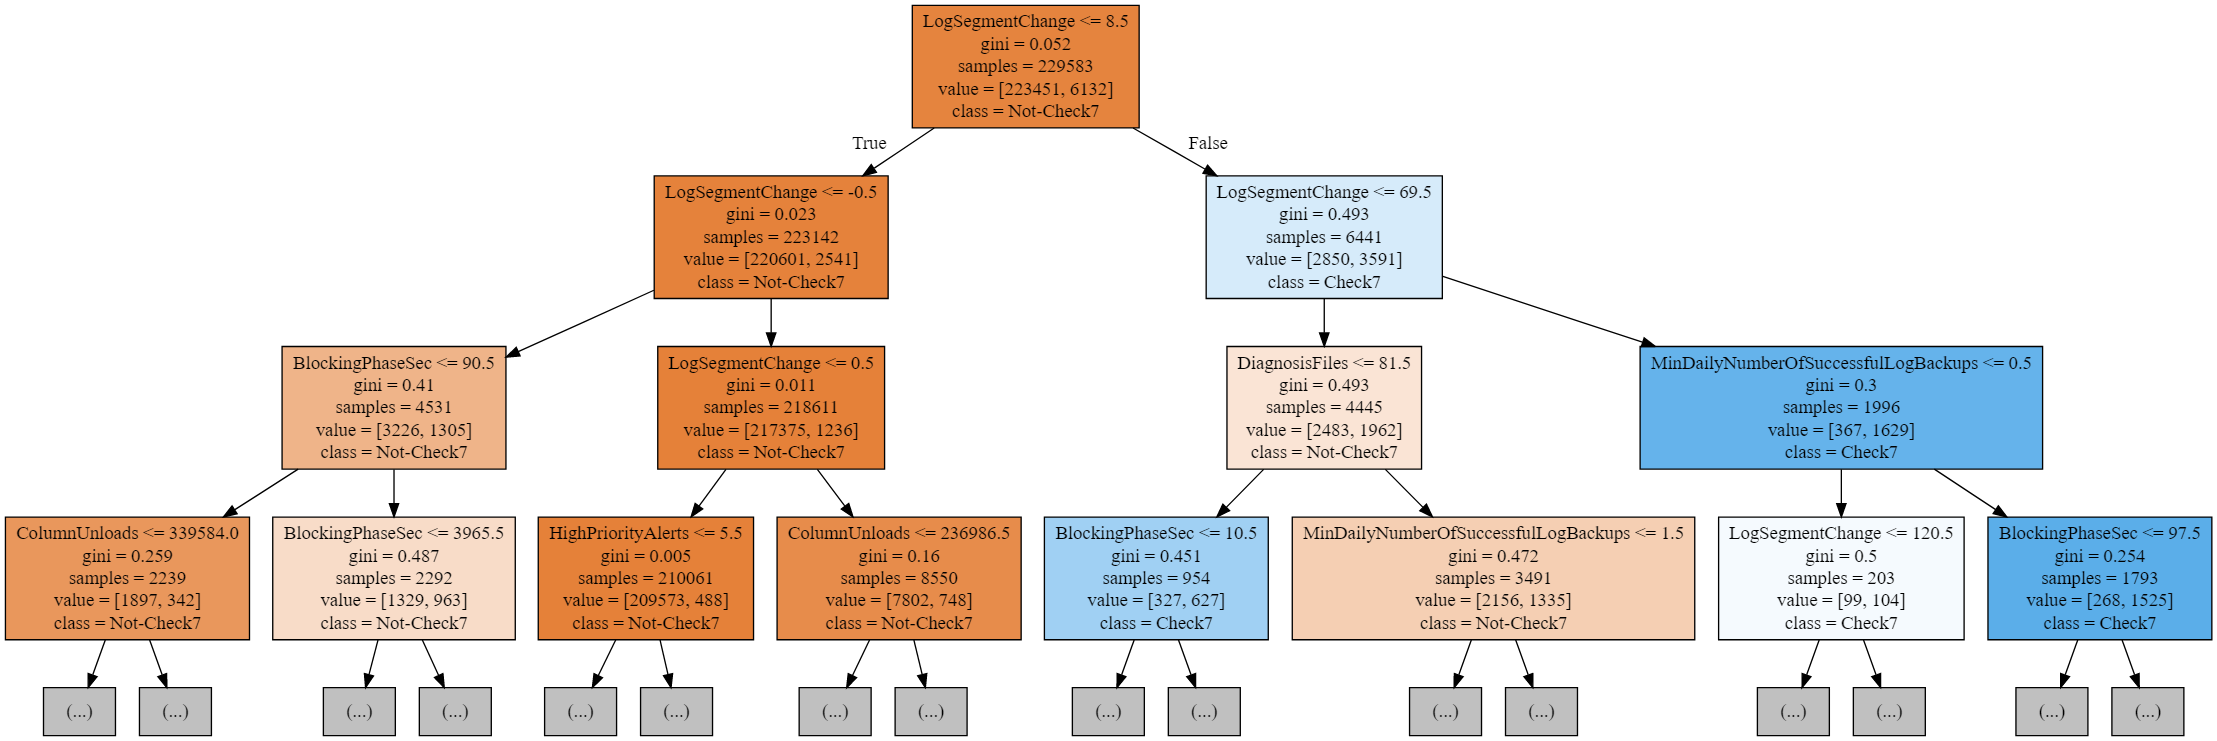

In [114]:
Image(filename="images/m7_3.png")

<b>Model for Check8:</b>

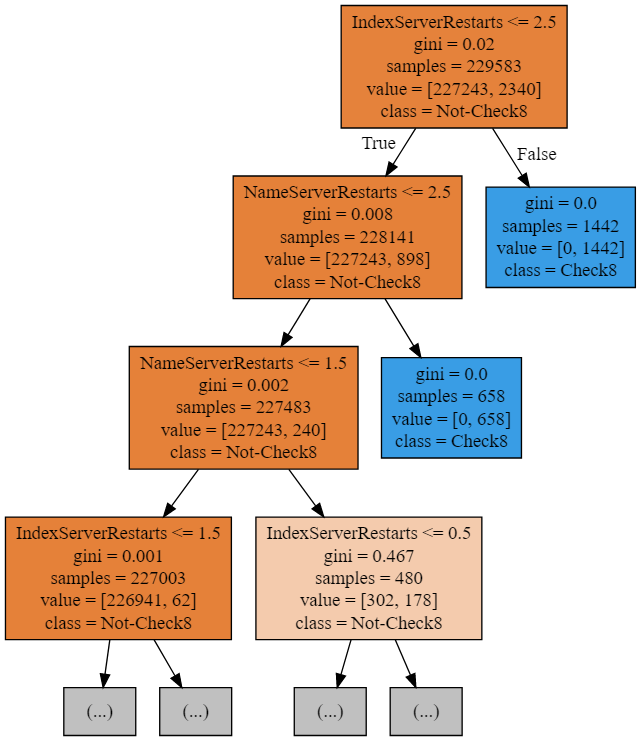

In [115]:
Image(filename="images/m8_3.png")

From these graphs, we extract the main rule for each label as below:

**Check1:** CPU > 90 AND CompositeOOMDums < 2.5 and PhysMEM

**Check2:** InstanceMEM > 90.005 AND PhysMEM < 94.935 and Dumps < 35.5

**Check3:** PhysMEM > 94.995 AND 
(MinDailyNumberOfSuccessfulLogBackups > 162.5 OR 
MinDailyNumberOfSuccessfulLogBackups <= 162.5 and DiagnosicFiles < 188.5)

**Check4:** IndexServerAllocationLimit > 89.995 AND (PhysMEM < 95 and LargestTableSize > 1,355,369.0)

**Check5:** TablesAllocation > 70 AND PhysMEM < 95 AND LargestTableSize > 1,355,369

**Check6:**
(DiagnosicFiles > 150 AND PhysMEM < 96 AND LogSegmentChange <= 2.5 (58601)) OR
(DiagnosicFiles < 150 AND DiagnosisFileSize > 6,411,645,440.0)

**Check7:**
(8.5 < LogSegmentChange) OR
(-0.5 < LogSegmentChange < 0.5) OR
(LogSegmentChange < -0.5 AND BlockingPhaseSec > 90.5)

**Check8:**
(IndexServerRestarts > 2.5) OR
(IndexServerRestarts < 2.5 AND NameServerRestarts > 2.5)

Almost features appear in these rules are ones mentioned in the data analysic section.

<div class="">
    <h3>3. Classifier chains</h3>
</div>

Classifier chains are a way of combining a number of binary classifiers into a single multi-label model that is capable of exploiting correlations among targets. Learn models are used as an input for next classifier. Therefore the order of classes is very important in classifier chains. In our problem, because the correlation is not strong, we try keeping the default order. Let's see if this model can learn more than previous model.

<b>Classifier chains:</b>

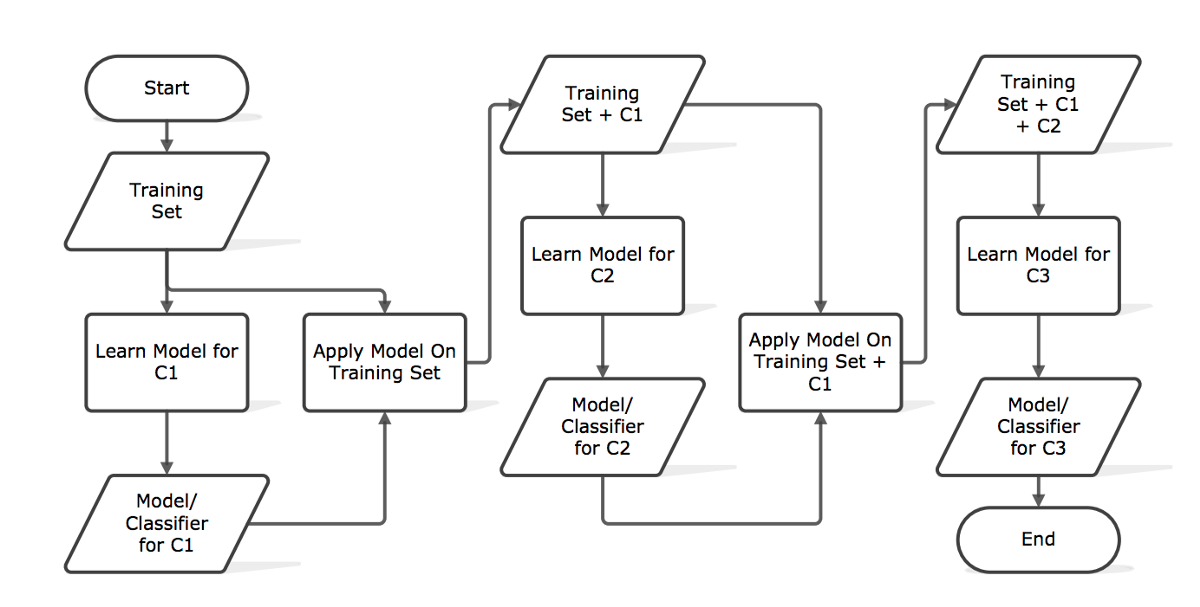

In [108]:
Image(filename="images/chain.png")

<div class="">
    <h4>3.1. Model Training</h4>
</div>

In [87]:
# initialize Classifier Chain multi-label classifier
# with decision tree base classifier
classifier_chain = ClassifierChain(DecisionTreeClassifier(max_depth=15))
# train
classifier_chain.fit(X_train, y_train)

ClassifierChain(classifier=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
        order=None, require_dense=[True, True])

<div class="">
    <h4>3.2. Model Evaluation</h4>
</div>

In [88]:
y_pred = classifier_chain.predict(X_test)
acc = accuracy_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred, average='macro')  
print("accuracy score: ", acc)
print("f1 score: ", f1)

accuracy score:  0.978099519130253
f1 score:  0.9430660042660419


We see that the result is similar to binary relevance model. It's because almost correlation between labels are weak.

With all above experiments, we observe that the binary relevance is the most suitable model for our problem because of its accuracy and interpretability.

<div class="">
    <h4>4. Gain more knowledge from the data</h4>
</div>

Instead focus on pre-defined 8 anomaly types, we create a new label named Anomaly which equals to 1 if there is any type of anomaly detected. We can use this label to identify anomaly behaviors in general.

<div class="">
    <h4>4.1. Data preparation</h4>
</div>

In [96]:
y = data.iloc[:,30:38].max(axis=1)
df = data.drop(labels, axis=1)

feature_names = df.columns.values

display(y.shape)
display(df.shape)

(286979,)

(286979, 30)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.8, test_size=0.2, stratify=y)

<div class="">
    <h4>4.2. Model Train</h4>
</div>

In [99]:
model = DecisionTreeClassifier(max_depth=15)
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<div class="">
    <h4>4.3. Model Evaluation</h4>
</div>

We evaluate the performance of model based on its prediction on test dataset.

In [100]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred, average='macro')  
print("accuracy score: ", acc)
print("f1 score: ", f1)

accuracy score:  0.9904522963272702
f1 score:  0.9895766210320318


It is a very good prediction. Let's check the complexity of the model.

In [101]:
print("Number of features: ", model.n_features_)
print("Number of nodes: ", model.tree_.node_count)
print("Length: ", model.tree_.max_depth)

Number of features:  30
Number of nodes:  1009
Length:  15


<div class="">
    <h4>4.4. Model Interpretation</h4>
</div>

Export the tree graph:

In [102]:
export_graphviz(model, max_depth=3, feature_names=feature_names, filled=True, out_file="anomaly-model.dot")

<b>Anomaly detection model:</b>

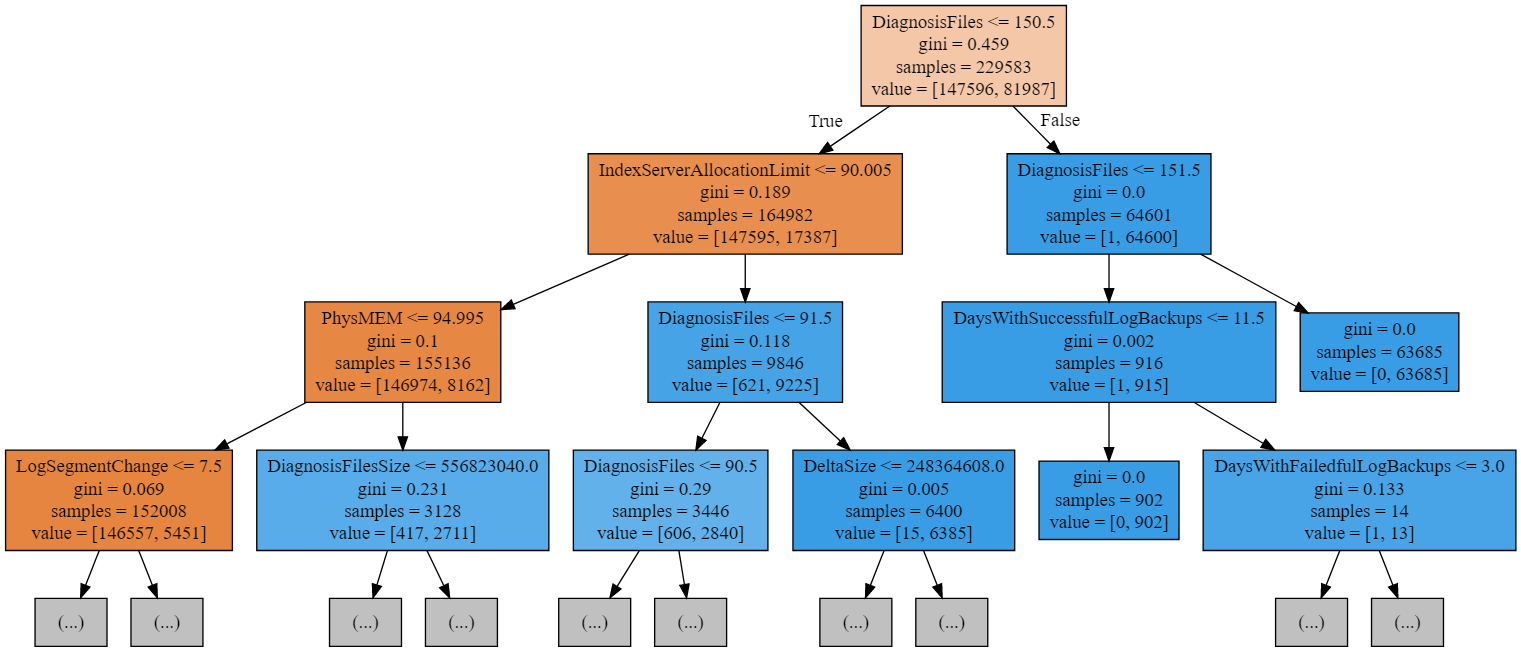

In [107]:
Image(filename="images/anomaly.png")

# Interpretable Models
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

We already build models which are able to detect anomaly and has a good interpretability. In this section we discuss about other interpretable models and try one of them, RIPPER.

<h3>1. Introduction about interpretable models</h3>

#### 1.2. Decision Rule
Rule-based systems are designed by defining specific rules that describe an anomaly. The decision rule is a simple IF-THEN statement consisting of a condition and a prediction. A single decision rule or a combination of several rules can be used to make predictions. They typically base on the experience of industry experts and are ideal to detect "known anomalies". These known anomalies are familiar to us as we recognize what is normal and what is not.<br><br>
Decision rules follow a general structure: IF the conditions are met THEN make a certain prediction:
- Condition is a conjunction of attributes tests:
<div>(A<sub>1</sub> = v<sub>1</sub>) and (A<sub>2</sub> = v<sub>2</sub>) and ... and (A<sub>n</sub> = v<sub>n</sub>)</div>
- Prediction is the class label

Quality of a classification rule can be evaluated by:
- Support or coverage of a rule: The percentage of instances to which the condition of a rule applies is called the support.
- Accuracy or confidence of a rule: The accuracy of a rule is a measure of how accurate the rule is in predicting the correct class for the instances to which the condition of the rule applies.</li>
Usually there is a trade-off between accuracy and support: By adding more features to the condition, we can achieve higher accuracy, but lose support.

#### 1.2. Advantages and Disadvantages
- Advantages:
    - The main advantage is easy of interpretation basically a human can understand how the model makes predictions and whether it makes sense. For a specific instance, it is possible to verify that the process worked correctly, and see what the main factors in the prediction were.<br>
    - Decision rules can be as expressive as decision trees while being more compact. Decision trees often also suffer from replicated sub-trees, that is when the splits in a left and a right child node have the same structure.<br>
    - The prediction with IF-THEN rules is fast since only a few binary statements need to be checked to determine which rules apply.<br>
    - Decision rules are robust against monotonous transformations of the input features because only the threshold in the conditions changes. They are also robust against outliers since it only matters if a condition applies or not.<br>
    - IF-THEN rules usually generate sparse models, which means that not many features are included. They select only the relevant features for the model. For example, a linear model assigns a weight to every input feature by default. Features that are irrelevant can simply be ignored by IF-THEN rules.

- Disadvantages: 
    - The research and literature for IF-THEN rules focus on classification and almost completely neglects regression.<br>
    - Many of the older rule-learning algorithms are prone to overfitting.<br>
    - Decision rules are bad in describing linear relationships between features and output. <br>
    - Can be memory and computationally intensive
    
#### 1.3. Interpretable Models 
There are many ways to learn rules from data. Some of them are:
- OneR: learns rules from a single feature. OneR is characterized by its simplicity, interpretability and its use as a benchmark.
- Sequential Covering: is a general procedure that iteratively learns rules and removes the data points that are covered by the new rule. This procedure is used by many rule learning algorithms.
- Bayesian Rule Lists: combine pre-mined frequent patterns into a decision list using Bayesian statistics. Using pre-mined patterns is a common approach used by many rule learning algorithms.

#### 1.4. RIPPER by WEKA
In this experiment, we choose the RIPPER model which is a variant of the sequential covering algorithm to study. We installed the application Weka to do the experiment. In fact, in Weka the RIPPER model called JRip. It is a basic incremental reduced-error pruning algorithm, based on incremental reduced error pruning (IREP).
The main idea of the Sequential covering algorithm: Find a good rule that applies to some of the data points. Remove all data points which are covered by the rule. The goal is creating rules that cover many examples of a class and none or very few of other classs. Repeat the rule-learning and removal of covered points with the remaining points until no more points are left or another stop condition is met. The result is a decision list.  

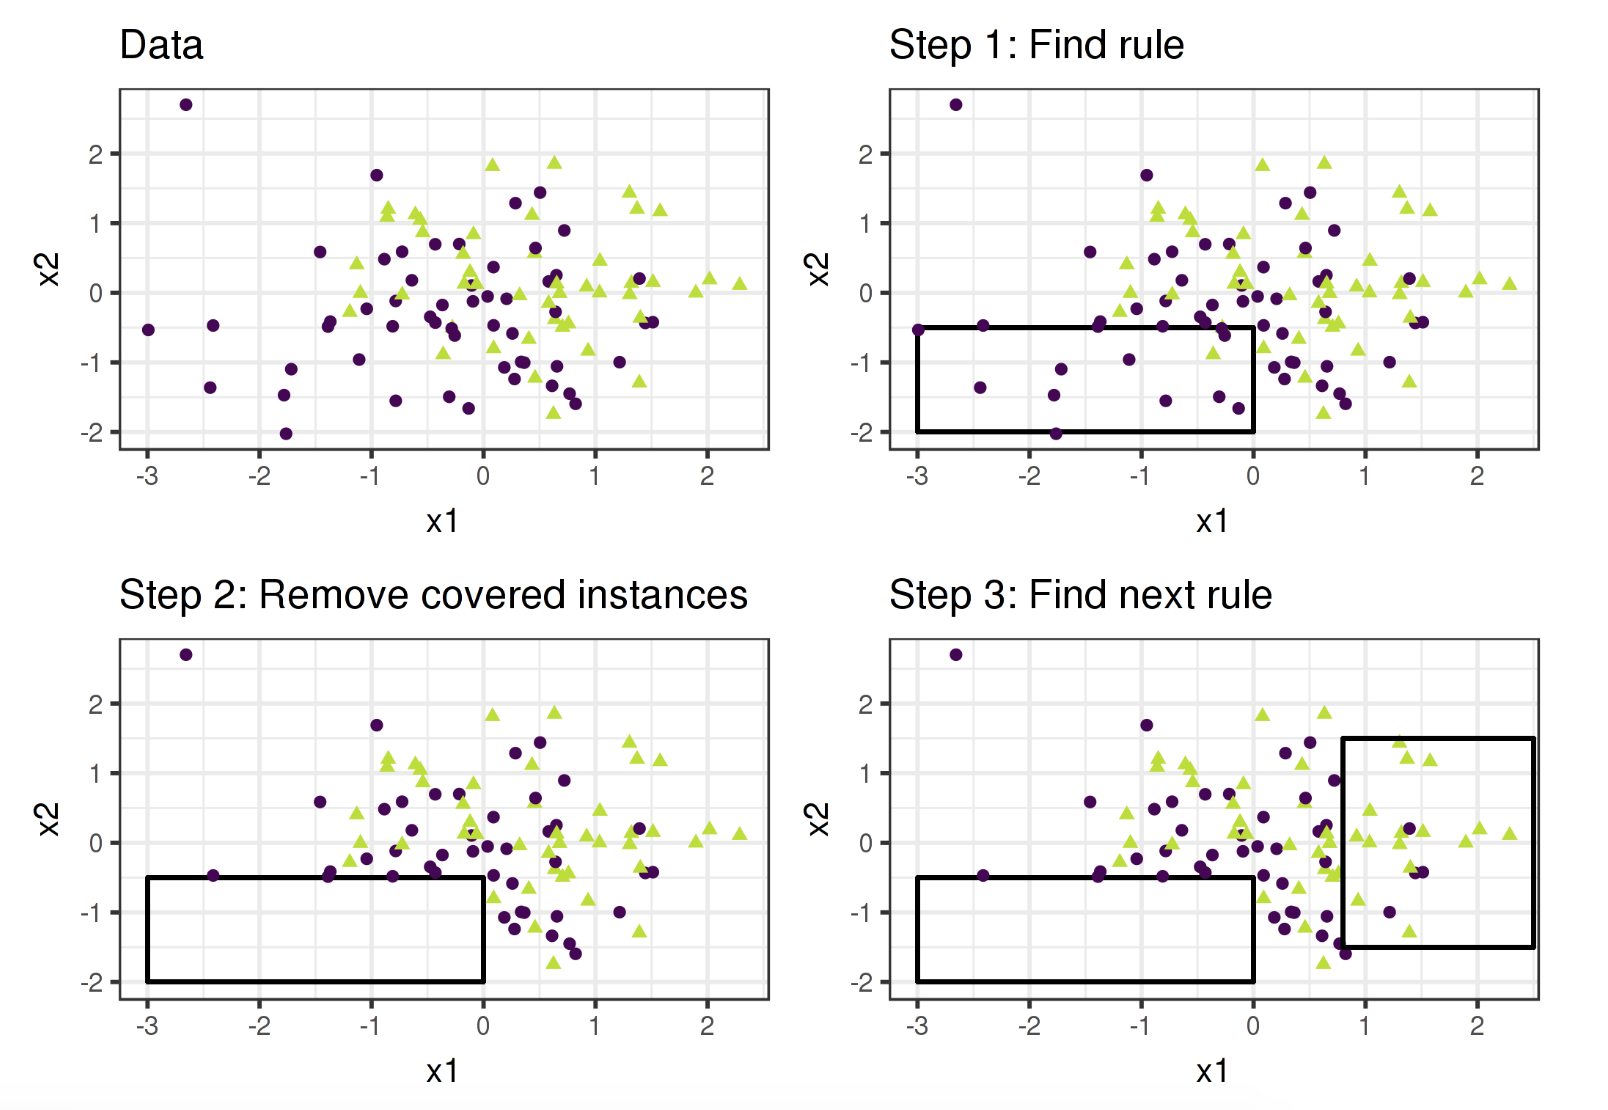

In [106]:
Image(filename="images/rule.png")

The stop conditions:
- When the rule is perfect, i.e. accuracy = 1
- When increase in accuracy gets below a given threshold
- When the training set cannot be split any further

RIPPER (Repeated Incremental Pruning to Produce Error Reduction) is a variant of the Sequential Covering algorithm. RIPPER is a bit more sophisticated and uses a post-processing phase (rule pruning) to optimize the decision list (or set). RIPPER can run in ordered or unordered mode and generate either a decision list or decision set.
    

<h3>2. Model Training Process</h3>

After done the preprocessing on data like previous sections, we extract data to CSV file and use this CSV file in **Weka application**
    

In [103]:
data.to_csv('anomaly_detection.csv',index=False)

We split 80% data for training and remain 20% data for testing. We train to classify for each class and these are results:
- __Check 1__:
    - Number of Rules : 13
    - Select 5 best examples: 
        - (CPU >= 90.01) and (DiagnosisFiles <= 187) and (DiagnosisFiles >= 97) and (InstanceMEM <= 73.02) => Check1=1 (242.0/0.0)
        - (CPU >= 90.01) and (Dumps <= 0) and (Disk >= 71.19) and (BlockingPhaseSec <= 1570) => Check1=1 (485.0/5.0)
        - (CPU >= 90.01) and (DiagnosisFilesSize >= 1342487431) and (LargestTableSize >= 173440246) => Check1=1 (118.0/3.0)
        - (CPU >= 90.01) and (DiagnosisFilesSize <= 1299958138) and (BlockingPhaseSec >= 18) and (MinDailyNumberOfSuccessfulLogBackups <= 123) => Check1=1 (93.0/2.0)
        - => Check1=0 (285325.0/3.0)
        
        _*The numbers in the bracket stand for positive/negative instance for the rule._
    - Time taken to build model: 137.03 seconds
    - Correctly Classified Instances: 57384 - 99.9791 %
    - Incorrectly Classified Instances: 12     - 0.0209 %
    - Root mean squared error: 0.0146
- __Check 2__:
    - Number of Rules : 21
    - Select 5 best examples:
        - (InstanceMEM >= 90) and (Check4 = 1) and (PhysMEM <= 94.67) and (HighPriorityAlerts <= 6) and (SystemID <= 1779) => Check2=1 (4360.0/5.0)
        - (InstanceMEM >= 90) and (Check4 = 1) and (MinDailyNumberOfSuccessfulLogBackups <= 230) and (DiagnosisFiles >= 189) => Check2=1 (1410.0/2.0)
        - (InstanceMEM >= 90) and (Check4 = 1) and (DiagnosisFiles <= 187) => Check2=1 (1969.0/14.0)
        - (InstanceMEM >= 90.01) and (Check4 = 1) and (DiagnosisFilesSize >= 1306483280) => Check2=1 (264.0/0.0)
        - => Check2=0 (278146.0/8.0)
    - Time taken to build model: 322.76 seconds
    - Correctly Classified Instances: 57357    - 99.9321 %
    - Incorrectly Classified Instances: 39    -  0.0679 %
    - Root mean squared error: 0.0254
- __Check 3__:
    - Number of Rules : 38
    - Select 5 best examples:
        - (PhysMEM >= 95) and (MinDailyNumberOfSuccessfulLogBackups <= 161) and (DiagnosisFilesSize >= 1309255655) and (LargestPartitionSize >= 248288896) => Check3=1 (1306.0/11.0)
        - (PhysMEM >= 95) and (DiagnosisFilesSize <= 1302828960) and (DiagnosisFilesSize >= 556677376) and (IndexServerAllocationLimit >= 69.37) => Check3=1 (1921.0/7.0)
        - (PhysMEM >= 95) and (DiagnosisFilesSize <= 556424582) and (SystemID >= 316) and (LogSegmentChange >= -1) and (BlockingPhaseSec >= 11) => Check3=1 (871.0/1.0)
        - (PhysMEM >= 95) and (DiagnosisFilesSize >= 1305327632) and (DeltaSize >= 795176703) and (MinDailyNumberOfSuccessfulLogBackups >= 129) => Check3=1 (685.0/3.0)
        - => Check3=0 (278803.0/46.0)
    - Time taken to build model: 899.03 seconds
    - Correctly Classified Instances: 57346 - 99.9129 %
    - Incorrectly Classified Instances: 50  - 0.0871 %
    - Root mean squared error: 0.0282   
- __Check 4__:
    - Number of Rules : 30
    - Select 5 best examples:
        - (IndexServerAllocationLimit >= 90) and (PhysMEM <= 94.54) and (DiagnosisFilesSize >= 1304499900) => Check4=1 (9227.0/24.0)
        - (IndexServerAllocationLimit >= 90) and (DiagnosisFilesSize <= 1303836128) and (DiagnosisFiles >= 92) => Check4=1 (10267.0/32.0)
        - (IndexServerAllocationLimit >= 90.36) and (LargestTableSize <= 718377930) => Check4=1 (1394.0/0.0)
        - (IndexServerAllocationLimit >= 90) and (DiagnosisFiles <= 90) and (BlockingPhaseSec >= 36) and (InstanceMEM >= 37.59) => Check4=1 (1036.0/1.0)
        -  => Check4=0 (262092.0/74.0)
    - Time taken to build model: 525.73 seconds
    - Correctly Classified Instances: 57339 - 99.9007 %
    - Incorrectly Classified Instances: 57  - 0.0993 %
    - Root mean squared error: 0.0307
- __Check 5__:
    - Number of Rules : 18
    - Select 5 best examples:
        - (TablesAllocation >= 70) and (Check4 = 1) and (PhysMEM <= 94.51) and (DeltaSize <= 14295859011) => Check5=1 (1654.0/6.0)
        - (TablesAllocation >= 70.01) and (Check4 = 1) and (Dumps <= 6) => Check5=1 (797.0/12.0)
        - (TablesAllocation >= 70.01) and (IndexServerAllocationLimit <= 89.99) and (DiagnosisFiles <= 184) => Check5=1 (223.0/7.0)
        - (TablesAllocation >= 70.01) and (DiagnosisFiles >= 190) => Check5=1 (163.0/1.0)
        - => Check5=0 (283867.0/23.0)
    - Time taken to build model: 303.88 seconds
    - Correctly Classified Instances: 57366 - 99.9477 %
    - Incorrectly Classified Instances: 30  - 0.0523 %
    - Root mean squared error: 0.0216
- __Check 6__:
    - Number of Rules : 41
    - Select 5 best examples:
        - (DiagnosisFiles >= 189) => Check6=1 (46919.0/1.0)
        - (DiagnosisFiles >= 151) and (DiagnosisFiles <= 187) => Check6=1 (25051.0/1.0)
        - (DiagnosisFiles >= 188) and (Check3 = 0) and (Check7 = 0) and (Check4 = 0) and (Check8 = 0) => Check6=1 (6300.0/5.0)
        - (DiagnosisFiles >= 188) and (Dumps >= 1) and (DeltaSize <= 23730303563) and (LargestTableSize >= 797170066) and (SystemID <= 98) => Check6=1 (135.0/2.0)
        - => Check6=0 (206325.0/46.0)
    - Time taken to build model: 581.47 seconds
    - Correctly Classified Instances: 57323 - 99.8728 %
    - Incorrectly Classified Instances: 73 -  0.1272 %
    - Root mean squared error: 0.0333
- __Check 7__:
    - Number of Rules : 40
    - Select 5 best examples:
        - (BlockingPhaseSec >= 101) and (LogSegmentChange >= 117) => Check7=1 (1067.0/65.0)
        - (BlockingPhaseSec >= 22) and (LogSegmentChange >= 104) and (PhysMEM <= 70.57) => Check7=1 (125.0/13.0)
        - (LogSegmentChange >= 68) and (IndexServerAllocationLimit >= 54.48) => Check7=1 (550.0/108.0)
        - (LogSegmentChange >= 70) and (BlockingPhaseSec >= 12) and (MinDailyNumberOfSuccessfulLogBackups >= 8) and (DeltaSize <= 7931758667) and (DiagnosisFiles <= 166) => Check7=1 (100.0/8.0)
        - => Check7=0 (281470.0/3347.0)
    - Time taken to build model: 724.97 seconds
    - Correctly Classified Instances: 56418 - 98.296 %
    - Incorrectly Classified Instances: 978 - 1.704 %
    - Root mean squared error: 0.1239
- __Check 8__:
    - Number of Rules : 5
    - Select 5 best examples:
        - (IndexServerRestarts >= 3) => Check8=1 (1792.0/0.0)
        - (NameServerRestarts >= 3) => Check8=1 (826.0/0.0)
        - (NameServerRestarts >= 1) and (IndexServerRestarts >= 2) => Check8=1 (216.0/0.0)
        - (NameServerRestarts >= 2) and (IndexServerRestarts >= 1) => Check8=1 (85.0/0.0)
        - => Check8=0 (284060.0/0.0)
    - Time taken to build model: 39.26 seconds
    - Correctly Classified Instances: 57396 - 100 %
    - Incorrectly Classified Instances: 0   - 0 %
    - Root mean squared error: 0


We can see that the results are really good with high Correctly Classified Instances and low Root mean squared error. The time taken to build model is quite quick from 39 to 899 seconds. Corresponding decision rules produces exactly the same predictions with the decision tree. Rule sets can be more perspicuous. 

#### Parameter Optimasation
We can tune these parameters to get a best model:
- F number: The number of folds for reduced error pruning. One fold is used as the pruning set. (Default: 3)
- N number: The minimal weights of instances within a split. (Default: 2)
- O number: Set the number of runs of optimizations. (Default: 2)
- D: Whether turn on the debug mode -S number 
The seed of randomization used in Ripper.(Default: 1)
- E: Whether NOT check the error rate >= 0.5 in stopping criteria. (default: check)
- P: Whether NOT use pruning. (default: use pruning)

# Conclusion
<hr style="height:1px;border:none;color:#333;background-color:#333;" />    

In the anomaly detection problem, we have tried different approaches and all of them leads to similar results:
- Exploratory Data Analysis: it helps us understand the data and provide first knowledge about key features.
- Single multi-label model: it will be more suitable to data which have strong correlation between classes and a large number of samples. However it still performs well in this problem.
- Binary Relevance mode: this is the suitable model for our data: good predictions, simple model and good interpretability. However it still needs a little technical knowledge to extract the rules from models.
- Classifier Chains: it will be more suitable to the problem which have strong correlation between classes and need a deeper analysic on the data to provide a good order for labels. 
- RIPPER: it performs well and be able to directly extract rules from model. It is very useful for users. 

All above approaches leads to similar results:
- __Check 1__: This anomaly is mainly related to high CPU. We can name it **CPUAnomaly**
- __Check 2__: This anomaly is mainly related to high InstanceMEM. We can name it **InstanceMEMAnomaly**
- __Check 3__: This anomaly is mainly related to high PhysMEM. We can name it **PhysMEMAnomaly**
- __Check 4__: This anomaly is mainly related to Server Allocation Limit. We can name it **IndexServerAllocationLimitAnomaly**
- __Check 5__: This anomaly is mainly related to Tables Allocation. We can name it **TablesAllocationAnomaly**
- __Check 6__: This anomaly is mainly related to Diagnosis Files. We can name it **DiagnosisAnomaly**
- __Check 7__: This anomaly is mainly related to Blocking Phase and Log Segment Change. We can name it **SegmentChangeAnomaly** 
- __Check 8__: This anomaly is related to Server Restarts. We can name it **RestartAnomaly**